In [ ]:
import pandas as pd
import numpy as np

# **INTRODUCTION AND PROBLEM STATEMENT**



## Latar Belakang:

Perusahaan Airbnb berencana untuk melakukan ekspansi dengan mendirikan properti baru di Bangkok. Untuk memastikan kesuksesan ekspansi ini, perusahaan perlu mengetahui wilayah mana yang paling tepat untuk mendirikan properti baru, jenis kamar apa yang paling diminati, dan harga optimal untuk setiap jenis kamar agar bisa mencapai profit maksimal.

## Rumusan Masalah:
1. Bagaimana cara menentukan wilayah yang paling optimal untuk ekpansi properti baru di Bangkok?
2. Apa tipe kamar yang paling tepat untuk dibangun di suatu wilayah?
3. Berapa harga optimal untuk setiap tipe kamar agar didapatkan profit maksimal?

# **DATA UNDERSTANDING**

## Data Loading

In [ ]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


**Dapat dilihat, bahwa terdapat 15854 baris dan 17 kolom dalam Database**

Ada satu kolom 0 yang hanya berfungsi untuk number, di sini akan di drop karena kolom tersebut dapat terwakilkan dengan index yang sudah ditampilkan.

In [ ]:
df = pd.read_csv('Airbnb Listings Bangkok.csv').drop('Unnamed: 0', axis=1)

In [ ]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


**Setelah dilakukan drop kolom untuk variabel yang tidak diketahui (0), maka didapatkan jumlah baris 15854 dan 16 kolom.**

## Memahami Data Dictionary

### Kolom Kategorikal:

1. id : nomor unik dari listing (properti)
2. name	: nama properti
3. host_id : id pemilik Airbnb
4. host_name : nama pemilik Airbnb
5. neighbourhood : Wilayah terdekat dari titik lokasi Airbnb. Ditentukan atau dipetakan menggunakan koordinat latitude dan longitude (garis lintang dan garis bujur) berdasarkan shapefiles digital yang terbuka atau publik. Shapefiles adalah format data geospasial yang digunakan untuk menyimpan informasi geografis, seperti batas-batas wilayah. Dalam konteks ini, lokasi properti diidentifikasi dan dikaitkan dengan neighbourhood tertentu menggunakan data geografis dari sumber terbuka.
6. latitude	: garis lintang, menggunakan proyeksi World Geodetic System 1984 (WGS84), yang merupakan standar global untuk koordinat geografis.
7. longitude : garis bujur, menggunakan proyeksi World Geodetic System 1984 (WGS84), yang merupakan standar global untuk koordinat geografis.
8. room_type: tipe kamar yang dimiliki terdiri dari 4 tipe kamar:'Entire home/apt', 'Private room', 'Hotel room', 'Shared room'
*   Entire Home/apt: sangat cocok jika Anda mencari pengalaman seperti di rumah sendiri. Dengan memilih seluruh tempat, Anda akan memiliki seluruh ruang untuk diri Anda sendiri. Ini biasanya mencakup kamar tidur, kamar mandi, dapur, dan pintu masuk terpisah.
*   Private Room: sangat cocok ketika Anda menginginkan privasi, namun tetap menghargai koneksi lokal. Ketika Anda memesan kamar pribadi, Anda akan memiliki kamar tidur pribadi untuk tidur, tetapi mungkin berbagi beberapa ruang dengan orang lain.
*   Hotel Room: mirip seperti private room, namun biasanya secara service room ini akan lebih baik.
*   Shared Room: pilihan tepat ketika Anda tidak keberatan berbagi ruang dengan orang lain. Ketika Anda memesan kamar bersama, Anda akan tidur di ruang yang dibagi dengan orang lain dan berbagi seluruh ruang dengan orang lain.

9. last_review : Tanggal terakhir kamar di review oleh tamu

### Kolom Numerik:
1. price : harga kamar per hari dalam satuan dollar
2. minimum_nights	: minimum hari yang disyaratkan jika tamu ingin menginap
3. number_of_reviews : jumlah review kamar
4. reviews_per_month : jumlah review kamar per bulan
5. calculated_host_listings_count	: jumlah listing atau properti yang dimiliki oleh host (pemilik properti) yang ada dalam data yang diambil atau dikumpulkan (scrape) saat ini di kota atau wilayah tertentu. Dengan kata lain, ini menunjukkan berapa banyak properti yang terdaftar oleh host tertentu di lokasi geografis tersebut dalam dataset yang sedang dianalisis.
6. availability_365	: ketersediaan listing untuk 365 hari ke depan berdasarkan kalender. Ini menunjukkan apakah suatu properti tersedia atau tidak untuk dipesan dalam satu tahun ke depan.(Catatan: Listing mungkin tidak tersedia karena sudah dipesan oleh tamu atau diblokir oleh host (pemilik) untuk periode tertentu dalam satu tahun tersebut).
7. number_of_reviews_ltm : jumlah ulasan yang diterima oleh listing (properti) dalam 12 bulan terakhir. Ini menunjukkan berapa banyak ulasan yang telah diberikan oleh tamu untuk properti tersebut selama satu tahun terakhir.



## Missing Values

In [ ]:
# Jumlah data kosong (NaN) untuk setiap variable
missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
missing

,jumlah
last_review,5790
reviews_per_month,5790
name,8
host_name,1
id,0
host_id,0
neighbourhood,0
latitude,0
longitude,0
room_type,0


In [ ]:
total_baris_data = len(df)
missing['persentase %'] = round((missing['jumlah']/total_baris_data)*100,2)
missing

,jumlah,persentase %
last_review,5790,36.52
reviews_per_month,5790,36.52
name,8,0.05
host_name,1,0.01
id,0,0.00
host_id,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00
room_type,0,0.00


**Terlihat bahwa Missing Value terbanyak terdapat di variable 'last_review' dan 'reviews_per_month' dengan presentase 36,52% dan 36,52%.**
**Kemudian Missing Value tergolong sedikit pada variabel 'name' dan 'host_name', masing-masing 0,05% dan 0,01%.**
**Variabel lain proporsi Missing Value 0, artinya setiap baris di masing-masing kolom sudah terisi semua.**

<Axes: >

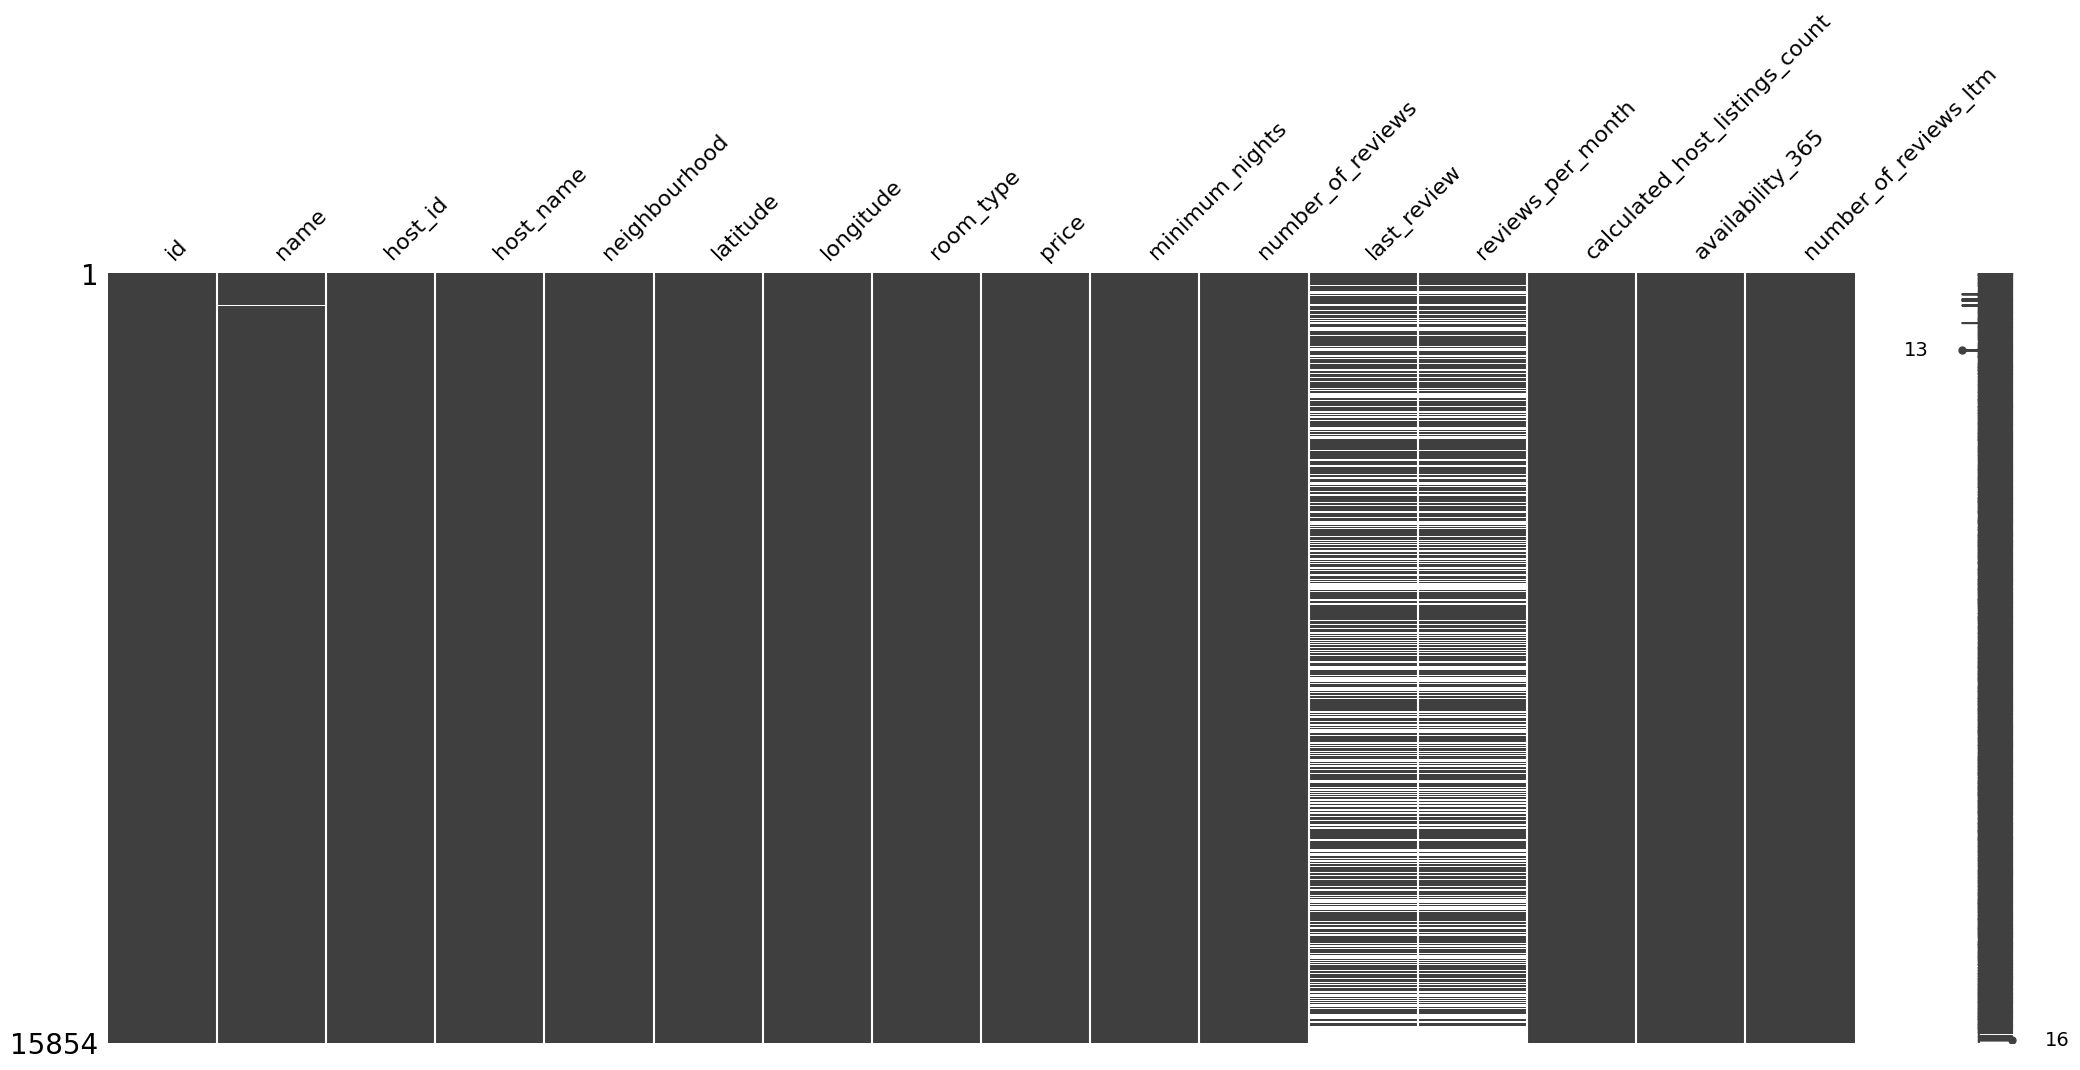

In [ ]:
import missingno

# Hubungan antar missing values secara visualisasi
missingno.matrix(df)

**Berdasarkan matriks yang dibuat dapat dilihat bahwa sebaran missing values di kolom last_review dan reviews_per_month cukup banyak sesuai jumlah presentase missing value nya yang mencapai 36,52%.**
**Sedangkan terlihat di kolom lain sangat sedikit atau bahkan sebagian besar kosong sebaran missing values yang ada.**

In [ ]:
# melihat semua data yang kosong
df[df.isna().any(axis = 1)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


**Jumlah baris kosong pada seluruh kolom adalah 5793 baris dari 16 kolom.**
**Artinya secara keseluruhan missing values cukup besar.**

Selanjutnya akan dilihat masing-masing kolom dengan Missing Values tertinggi, yaitu last_review, reviews_per_month, name dan host_name

In [ ]:
# Melihat data yang kosong pada variable last_review
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [ ]:
# Melihat data yang kosong pada variable reviews_per_month
df[df['reviews_per_month'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


In [ ]:
# Melihat data yang kosong pada variable name
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [ ]:
# Melihat data yang kosong pada variable host_name
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


## Data Duplikat

In [ ]:
# jumlah yang duplikat
df.duplicated().sum()

0

**Tidak ada data duplikasi dalam setiap baris di masing-masing kolom.**

## Variable Numerik

### Statistika Deskriptif

Selanjutnya akan dilakukan drop kolom seperti id, host_id, latitude, dan longitude dalam analisis statistika deskriptif, karena kolom-kolom tersebut tidak memberikan informasi berguna yang relevan untuk analisis. Hal ini tepat dan sesuai dilakukan karena:

1. Kolom id dan host_id

    id dan host_id adalah identifier unik untuk masing-masing listing dan host dalam dataset.
    Kolom ini tidak memiliki nilai analitis untuk statistika deskriptif atau eksplorasi data (EDA) karena mereka tidak memberikan informasi tentang distribusi, rata-rata, atau karakteristik lain dari data.
    Menyertakan kolom ini dalam analisis deskriptif akan mengacaukan hasil dan visualisasi karena data ini tidak memiliki pola atau tren yang bisa dianalisis.
2. Kolom latitude dan longitude

    latitude dan longitude menyediakan informasi geografis yang tepat tentang lokasi setiap listing. Meskipun ini sangat berguna untuk analisis berbasis lokasi (seperti membuat peta atau menentukan jarak ke landmark tertentu), namun tidak relevan untuk analisis statistika deskriptif dasar.
    Dalam hal ini juga tidak akan melakukan analisis geografis atau spasial, menyimpan kolom ini hanya akan menambah kebingungan tanpa memberikan wawasan yang berarti.



Di sini hanya akan digunakan kolom yang memberikan informasi numerik atau kategorikal yang relevan dan bermakna dan fokus pada data yang benar-benar memberikan insight yang berguna untuk tujuan analisis

In [ ]:
# Menghapus kolom yang tidak relevan untuk analisis deskriptif dasar
df = df.drop(columns=['id', 'host_id', 'latitude', 'longitude'])

df

,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,Private room,1316,1,0,NaN,NaN,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,Private room,800,60,0,NaN,NaN,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,Private room,2298,28,0,NaN,NaN,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,Phakhamon,Ratchathewi,Private room,1429,1,0,NaN,NaN,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,Private room,1214,1,0,NaN,NaN,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,Private room,1214,1,0,NaN,NaN,14,365,0


In [ ]:
# Statistika dekriptif
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


**Dari dataframe di atas, dapat dilihat nilai jumlah data (count), rata-rata (mean), standar deviasi (std), nilai terendah (min), nilai tertinggi (max), kuartil bawah (25%), median (50%), dan kuartil atas (75%).**

### Distribusi Data

In [ ]:
# library untuk membuat grafik
import matplotlib.pyplot as plt
import seaborn as sns


#### Grafik Histogram

Menampilkan grafik histogram untuk melihat sebaran data di masing-masing variabel.

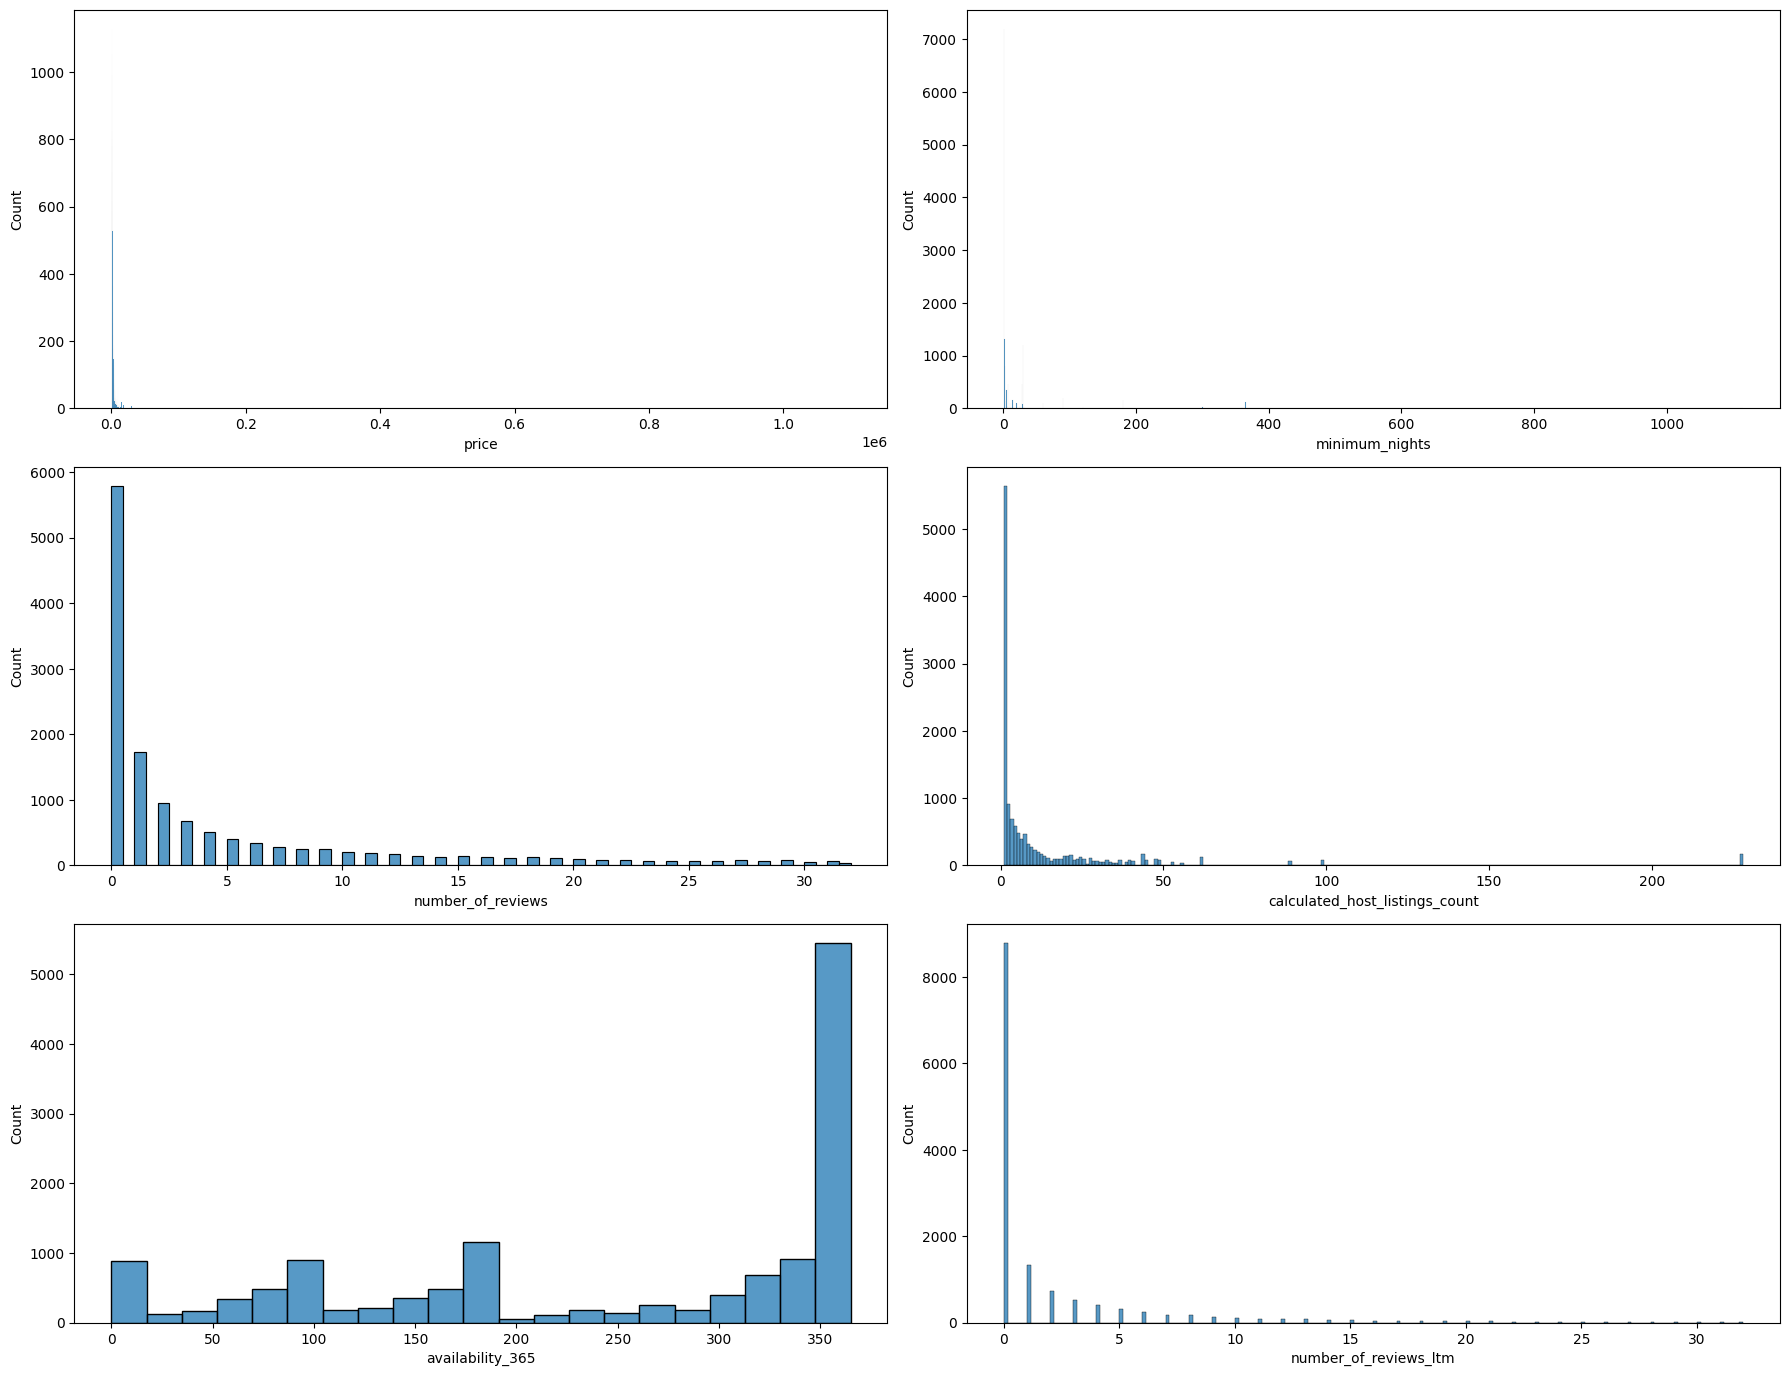

In [ ]:
numerik = df.select_dtypes(include = 'number')

plt.figure(figsize = (18,18))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.histplot(df[setiap_kolom])
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

**Secaea garis besar, sebaran data di masing-masing variabel terlihat tidak normal karena tidak membentuk kurva data yang menumpuk di tengah**

#### Uji Statistika Distribusi

Kemudian dilakukan uji distribusi data dengan empat metode yang berbeda di setiap kolom numerik

In [ ]:
!pip install scipy

##### Uji Kolmogrov Smirnov

In [ ]:
# Kolmogorov Smirnov
from scipy.stats import kstest

# Identifikasi kolom numerik
numeric_columns = df.select_dtypes(include=['number']).columns

# Loop untuk melakukan uji Kolmogorov-Smirnov pada setiap kolom numerik
for column in numeric_columns:

    # memastikan kolom tidak mengandung NaN
    df_column = df[column].dropna()

    # Uji Kolmogorov-Smirnov
    stat, pval = kstest(df_column, 'norm')

    print(f"Uji Kolmogorov-Smirnov untuk kolom '{column}':")
    if pval < 0.05:
        print('Data tidak normal')
    else:
        print('Data normal')
    print(f"Statistik: {stat}, P-value: {pval}\n")

Uji Kolmogorov-Smirnov untuk kolom 'price':
Data tidak normal
Statistik: 0.9999369244354737, P-value: 0.0

Uji Kolmogorov-Smirnov untuk kolom 'minimum_nights':
Data tidak normal
Statistik: 0.8413447460685429, P-value: 0.0

Uji Kolmogorov-Smirnov untuk kolom 'number_of_reviews':
Data tidak normal
Statistik: 0.5024800938623417, P-value: 0.0

Uji Kolmogorov-Smirnov untuk kolom 'reviews_per_month':
Data tidak normal
Statistik: 0.5039893563146316, P-value: 0.0

Uji Kolmogorov-Smirnov untuk kolom 'calculated_host_listings_count':
Data tidak normal
Statistik: 0.8413447460685429, P-value: 0.0

Uji Kolmogorov-Smirnov untuk kolom 'availability_365':
Data tidak normal
Statistik: 0.9415603560068108, P-value: 0.0

Uji Kolmogorov-Smirnov untuk kolom 'number_of_reviews_ltm':
Data tidak normal
Statistik: 0.5, P-value: 0.0



##### Uji Liliefors

In [ ]:
# Liliefors
from statsmodels.stats.diagnostic import lilliefors

for column in numeric_columns:
    # Pastikan kolom tidak mengandung NaN
    df_column = df[column].dropna()

    # Uji Lilliefors
    stat, pval = lilliefors(df_column)

    print(f"Uji Lilliefors untuk kolom '{column}':")
    if pval < 0.05:
        print('Data tidak normal')
    else:
        print('Data normal')
    print(f"Statistik: {stat}, P-value: {pval}\n")

Uji Lilliefors untuk kolom 'price':
Data tidak normal
Statistik: 0.4531155857871898, P-value: 0.0009999999999998899

Uji Lilliefors untuk kolom 'minimum_nights':
Data tidak normal
Statistik: 0.38925456816032805, P-value: 0.0009999999999998899

Uji Lilliefors untuk kolom 'number_of_reviews':
Data tidak normal
Statistik: 0.34087867273493366, P-value: 0.0009999999999998899

Uji Lilliefors untuk kolom 'reviews_per_month':
Data tidak normal
Statistik: 0.23065308367090898, P-value: 0.0009999999999998899

Uji Lilliefors untuk kolom 'calculated_host_listings_count':
Data tidak normal
Statistik: 0.33511817125460913, P-value: 0.0009999999999998899

Uji Lilliefors untuk kolom 'availability_365':
Data tidak normal
Statistik: 0.20554926799804996, P-value: 0.0009999999999998899

Uji Lilliefors untuk kolom 'number_of_reviews_ltm':
Data tidak normal
Statistik: 0.3481060265949742, P-value: 0.0009999999999998899



##### Uji Shapiro Wilk

In [ ]:
# Shapiro Wilk
from scipy.stats import shapiro

for column in numeric_columns:
    # Pastikan kolom tidak mengandung NaN
    df_column = df[column].dropna()

    # Uji Shapiro-Wilk
    stat, pval = shapiro(df_column)

    # Output hasil
    print(f"Uji Shapiro-Wilk untuk kolom '{column}':")
    if pval < 0.05:
        print('Data tidak normal')
    else:
        print('Data normal')
    print(f"Statistik: {stat}, P-value: {pval}\n")

Uji Shapiro-Wilk untuk kolom 'price':
Data tidak normal
Statistik: 0.04441873710284405, P-value: 1.4396800095947464e-127

Uji Shapiro-Wilk untuk kolom 'minimum_nights':
Data tidak normal
Statistik: 0.2797768531996544, P-value: 1.0652328336140456e-119

Uji Shapiro-Wilk untuk kolom 'number_of_reviews':
Data tidak normal
Statistik: 0.44104322360996817, P-value: 7.343043476264459e-113

Uji Shapiro-Wilk untuk kolom 'reviews_per_month':
Data tidak normal
Statistik: 0.6763133566116333, P-value: 1.8778403002722375e-87

Uji Shapiro-Wilk untuk kolom 'calculated_host_listings_count':
Data tidak normal
Statistik: 0.41742623114480515, P-value: 5.7998500778495485e-114

Uji Shapiro-Wilk untuk kolom 'availability_365':
Data tidak normal
Statistik: 0.8323456567804426, P-value: 3.634561086896923e-83

Uji Shapiro-Wilk untuk kolom 'number_of_reviews_ltm':
Data tidak normal
Statistik: 0.4115633894821422, P-value: 3.1321471799646922e-114



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15854.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10064.
  res = hypotest_fun_out(*samples, **kwds)


##### Uji D'Agustino Person

In [ ]:
# D'Agustino Pearson
from scipy.stats import normaltest


for column in numeric_columns:
    # Pastikan kolom tidak mengandung NaN
    df_column = df[column].dropna()

    # Uji D'Agostino-Pearson
    stat, pval = normaltest(df_column)

    # Output hasil
    print(f"Uji D'Agostino-Pearson untuk kolom '{column}':")
    if pval < 0.05:
        print('Data tidak normal')
    else:
        print('Data normal')
    print(f"Statistik: {stat}, P-value: {pval}\n")

Uji D'Agostino-Pearson untuk kolom 'price':
Data tidak normal
Statistik: 43049.94444612527, P-value: 0.0

Uji D'Agostino-Pearson untuk kolom 'minimum_nights':
Data tidak normal
Statistik: 22191.920997753834, P-value: 0.0

Uji D'Agostino-Pearson untuk kolom 'number_of_reviews':
Data tidak normal
Statistik: 19164.706394803216, P-value: 0.0

Uji D'Agostino-Pearson untuk kolom 'reviews_per_month':
Data tidak normal
Statistik: 9084.26770889444, P-value: 0.0

Uji D'Agostino-Pearson untuk kolom 'calculated_host_listings_count':
Data tidak normal
Statistik: 16475.886965135196, P-value: 0.0

Uji D'Agostino-Pearson untuk kolom 'availability_365':
Data tidak normal
Statistik: 12899.894275111394, P-value: 0.0

Uji D'Agostino-Pearson untuk kolom 'number_of_reviews_ltm':
Data tidak normal
Statistik: 24897.58719541155, P-value: 0.0



**Berdasarkan histogram dan uji normalitas di atas, dapat dilihat dari 4 metode yang diuji, hasil yang didapatkan adalah sama untuk setiap kolom numerik, yaitu distribusi tidak normal.**

### Outliers

#### Grafik Bloxpot

Selanjutnya adalah membuat boxplot untuk mengetahui jumlah masing-masing outliers di setiap variabel.

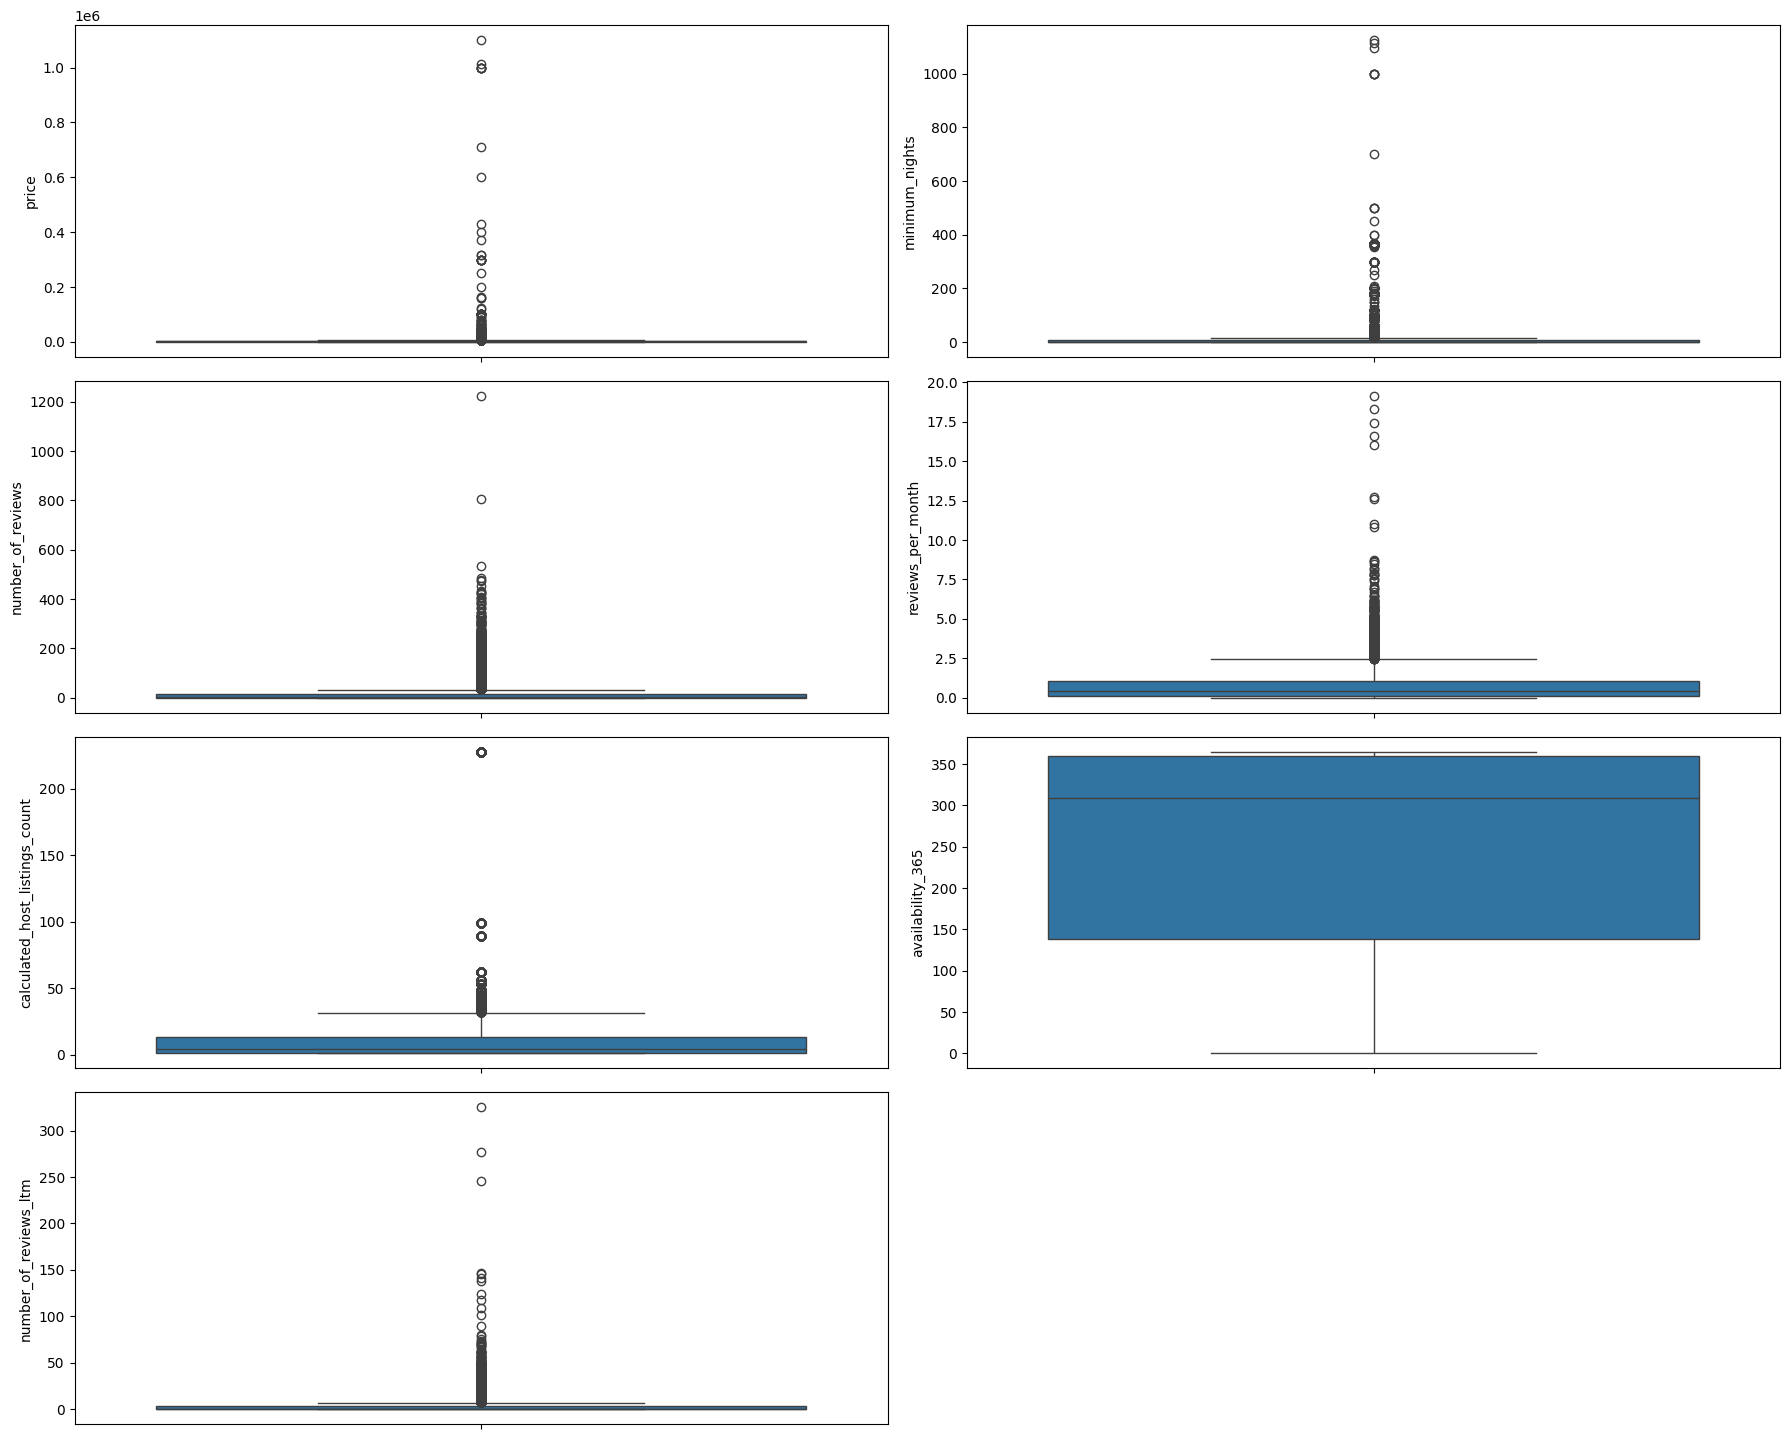

In [ ]:
numerik = df.select_dtypes(include = 'number')

plt.figure(figsize = (18,18))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(5,2,posisi)
    sns.boxplot(df[setiap_kolom])
    posisi = posisi + 1

    plt.tight_layout()


**Berdasarkan visualisasi yang ditampilkan dapat dilihat bahwa ouliers di kolom price, number_of_reviews, minimum nights, calculated_host_listings_count dan number_of_reviews_ltm masih banyak yang melewati batas atas (Q3). sedangkan tabel availability_365 tidak menunjukan adanya data yang keluar dari batas atas (Q3) maupun batas bawah (Q3), artinya tidak ada ouliers dari data tersebut.**

#### Interquartile Range (IQR)

Agar Jumlah outliers lebih terlihat jelas, maka dilakukan uji outliers dengan menggunakan Interquartile Range (IQR). Uji ini lebih cocok digunakan karena data terdistribusi tidak normal, dibandingkan dengan Uji Z Score yang lebih baik digunakan pada data yang terdistribusi normal.

In [ ]:
list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

}).sort_values(by = 'jumlah outliers', ascending = False)

,kolom,jumlah outliers
1,minimum_nights,3168
2,number_of_reviews,2240
6,number_of_reviews_ltm,2219
4,calculated_host_listings_count,1832
0,price,1403
3,reviews_per_month,693
5,availability_365,0


**Setelah dilakukan pengujian jumlah outliers, dapat dilihat bahwa kolom dengan outliers terbanyak adalah variabel minimum_nights yaitu 3168 diikuti dengan number_of_reviews, number_of_reviews_Itm, calculated_host_listings_counts, dan price masing-masing mempunyai nilai 2240, 2219, 1832 dan 1403. Sedangkan variabel availabilty_365 tidak mempunyai outliers.**

### Korelasi

#### Heatmap

In [ ]:
numerik.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,0.020155,-0.004368,-0.011497,-0.013299,0.000789,-0.014163
minimum_nights,0.020155,1.000000,-0.034211,-0.089948,-0.053596,0.053174,-0.079015
number_of_reviews,-0.004368,-0.034211,1.000000,0.512523,0.036338,-0.077229,0.499417
reviews_per_month,-0.011497,-0.089948,0.512523,1.000000,0.069057,-0.019477,0.598638
calculated_host_listings_count,-0.013299,-0.053596,0.036338,0.069057,1.000000,0.008542,0.111925
availability_365,0.000789,0.053174,-0.077229,-0.019477,0.008542,1.000000,-0.077701
number_of_reviews_ltm,-0.014163,-0.079015,0.499417,0.598638,0.111925,-0.077701,1.000000


#### Uji Korelasi Spearman

Uji ini dilakukan untuk melihat hubungan antar variabel numerik. Uji korelasi spearman dipilih karena data terdistribusi tidak normal dan masih banyak outliers.

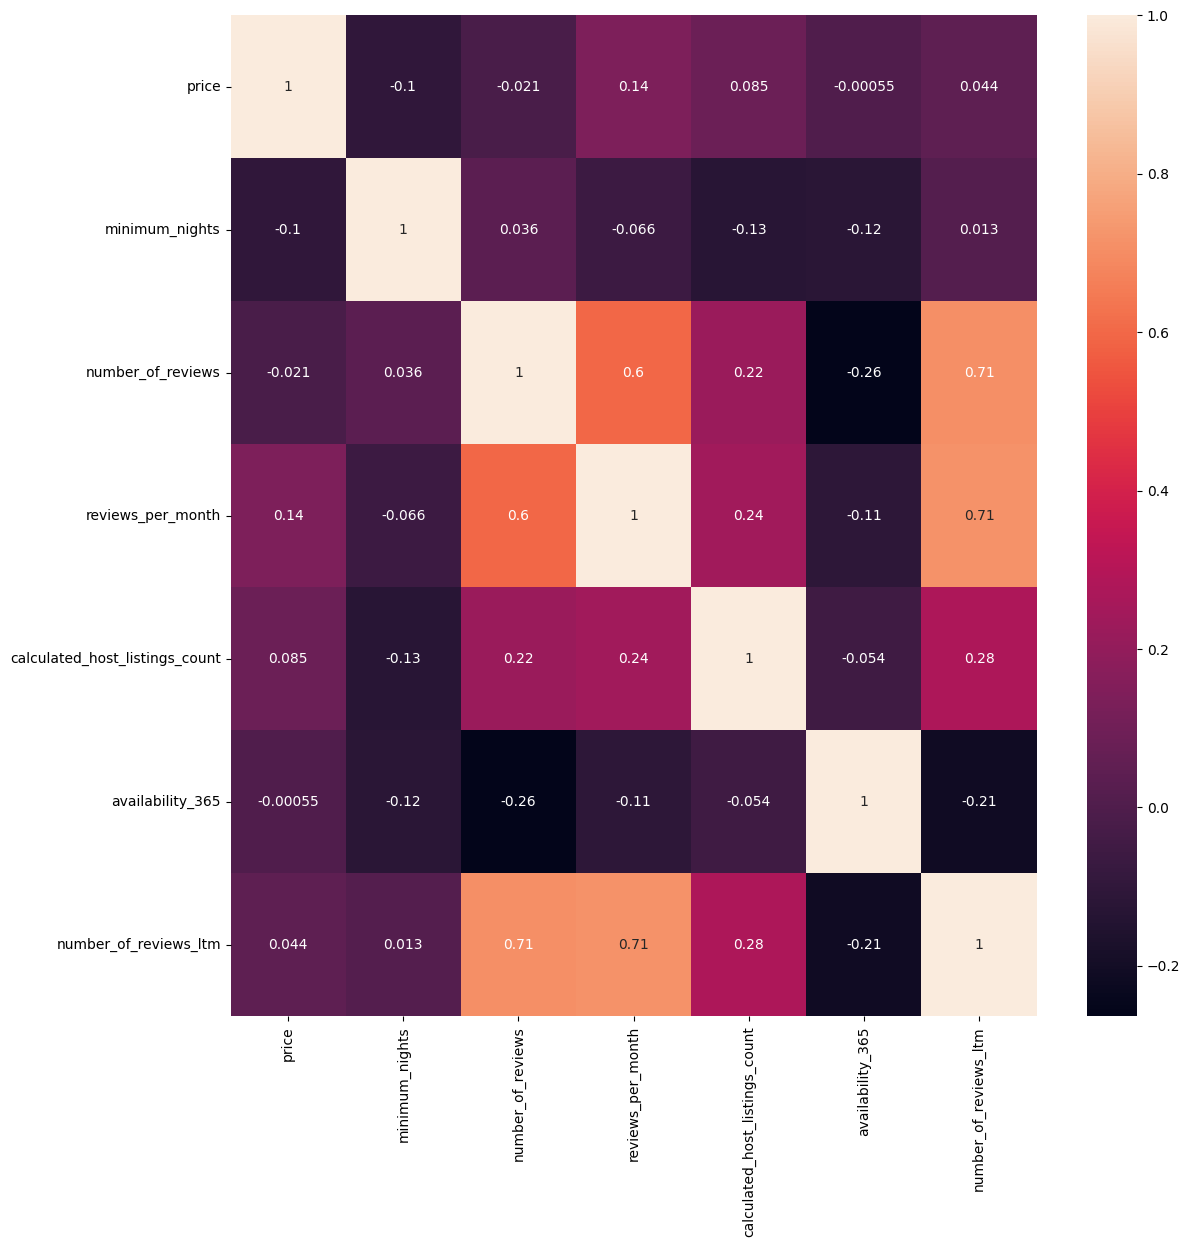

In [ ]:
# Mengatur ukuran figure (lebar, tinggi) dalam inci
plt.figure(figsize=(13, 13))

# Membuat heatmap
sns.heatmap(numerik.corr(method = 'spearman'), annot = True)

# Menampilkan plot
plt.show()

**Interpretasi Heatmap:**

1. Warna Ungu Gelap (atau warna yang lebih dekat dengan -1): Menunjukkan korelasi negatif yang kuat antara variabel.

2. Warna Kuning Muda (atau warna yang lebih dekat dengan +1): Menunjukkan korelasi positif yang kuat antara variabel.

3. Warna Ungu (atau warna yang mendekati 0): Menunjukkan bahwa tidak ada korelasi atau sangat lemah.

**Berdasarkan Heatmap yang telah dibuat dengan dataframe yang ada didapatkan hasil:**
1. Variabel availability_365 dan number_of_reviews menunjukkan korelasi negatif yang kuat antara variabel karena mendekati nilai -1 yaitu bernilai -0,26

2. Korelasi positif yang kuat ditunjukan oleh variabel number_of_reviews terhadap number_of_reviews_ltm dan reviews_per_month terhadapt number_of_reviews_ltm dengan nilai 0,71 sehingga mendekati angka 1.

3. Variabel availabily_365 terhadap price menunjukkan tidak ada korelasi atau sangat lemah dengan nilai -0,00055 yang mendekati 0.



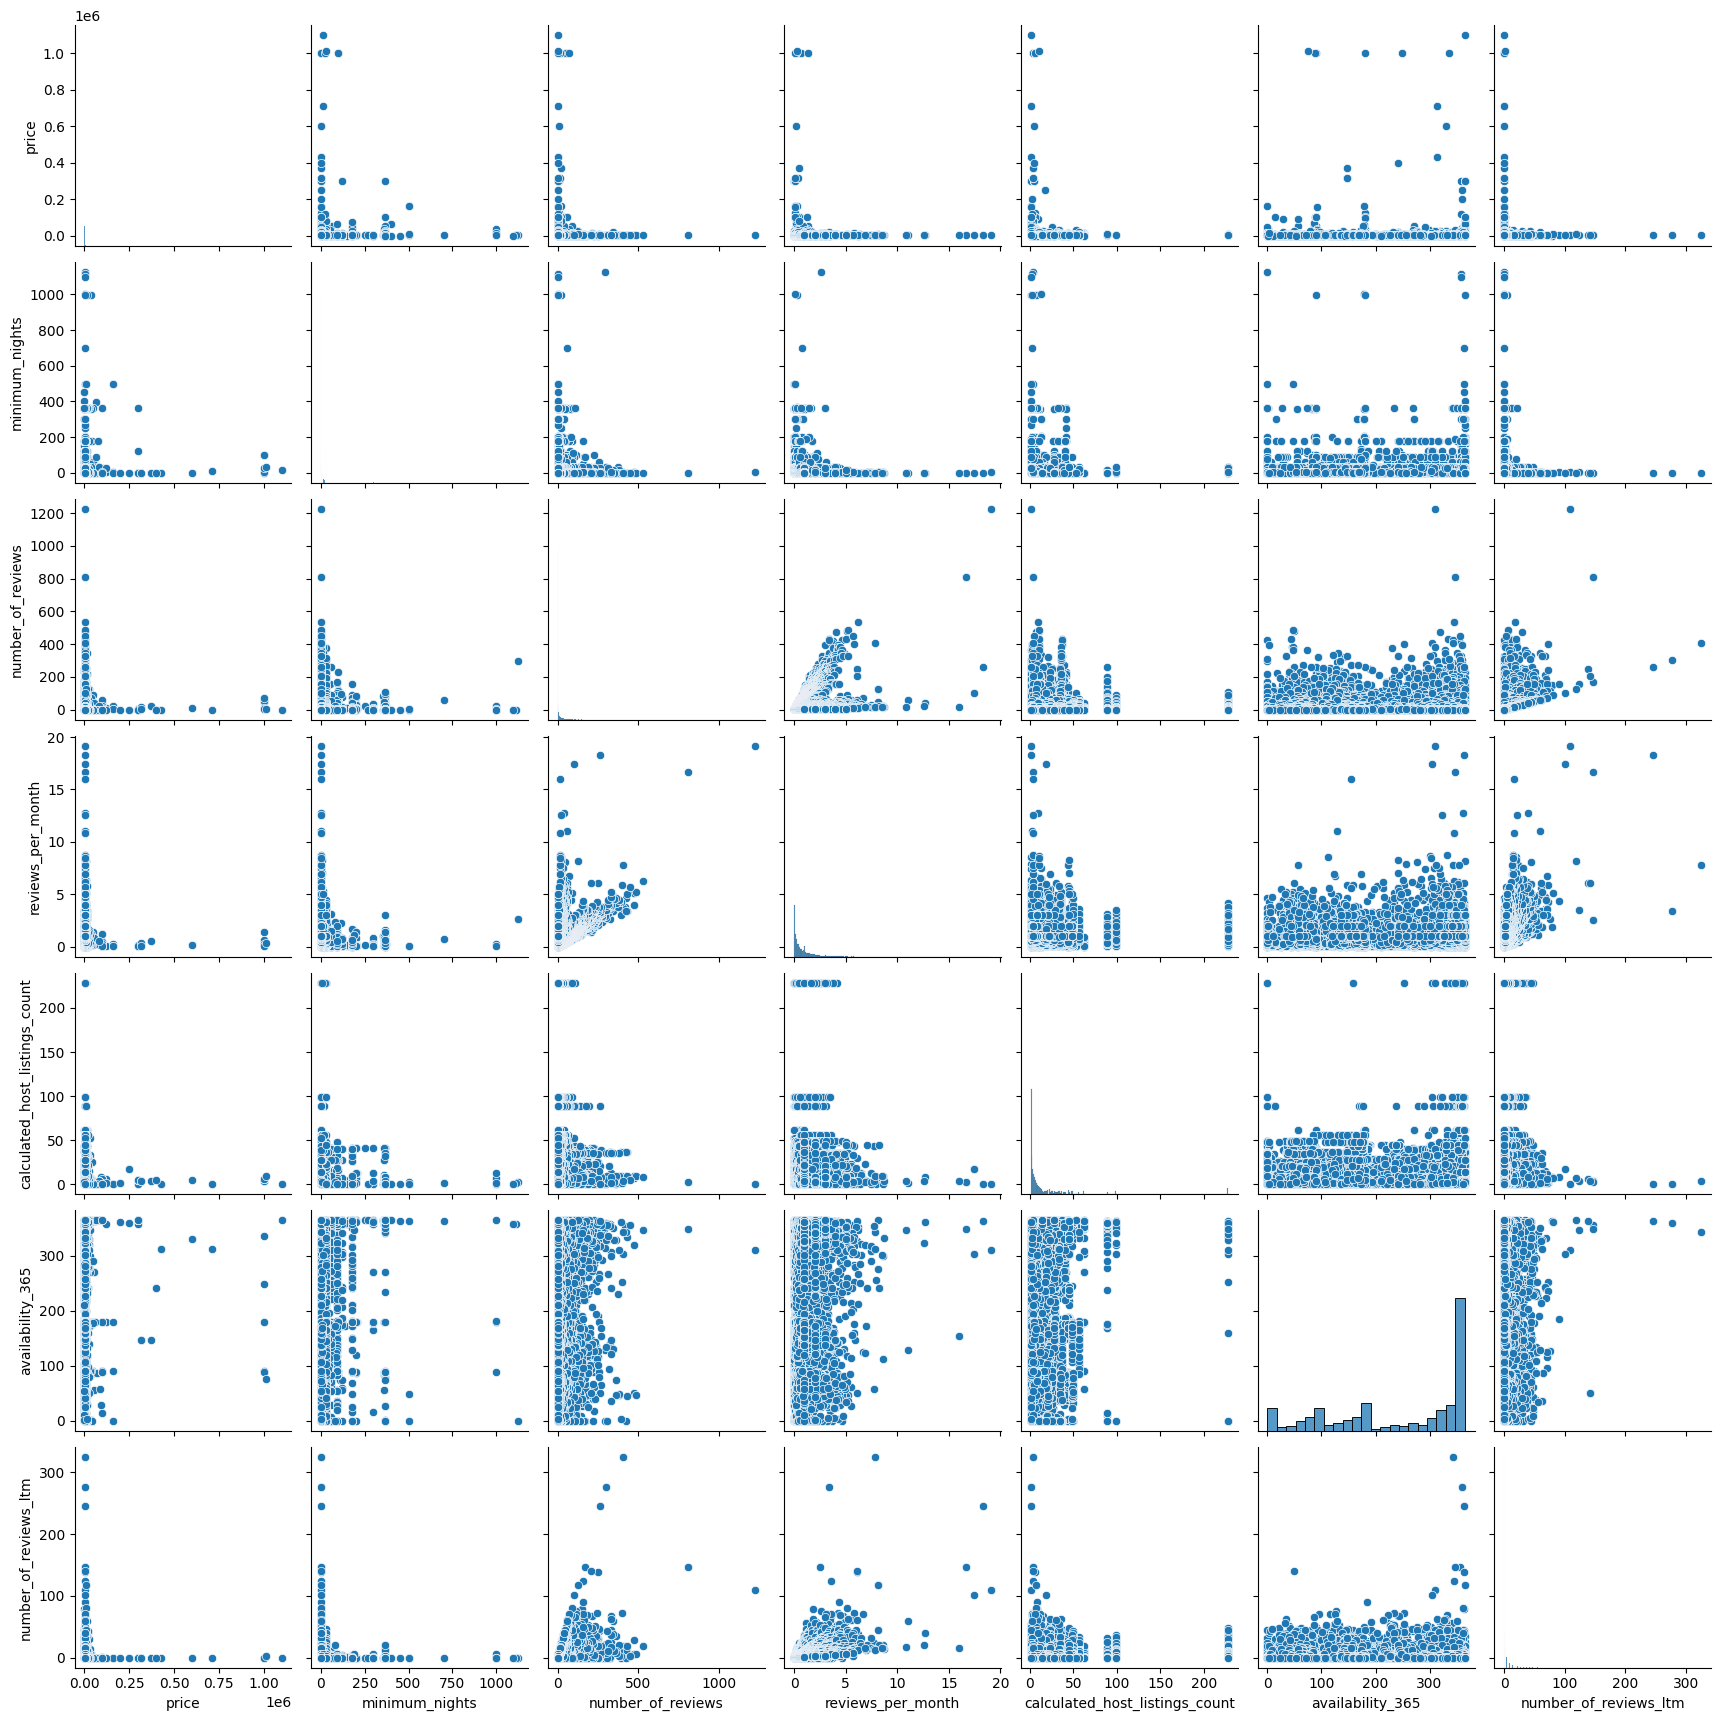

In [ ]:
sns.pairplot(df)

**Hapir sama seperti heatmap, pairplot di atas menunjukan korelasi antar variabel numerik**

## Variabel Kategorik

### Describe

Mendeskripsikan variabel-variabel yang termasuk ke dalam kategori numerik.

In [ ]:
df.describe(include = 'object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


**Variabel name, host_name, neighbourhood, room_type dan last_review masuk ke dalam data kategorik dengan jumlah data (count), value unik (unique), entri value terbanyak (top) dan jumlah value terbanyak (freq) sesuai dataframe yang ditampilkan**

### Unique Value / Kardinalitas

Melihat jumlah unique value dari setiap variabel kategorik

In [ ]:
kategorik = df.select_dtypes(include = 'object')

In [ ]:
from os import replace
# menghitung jumlah unique value setiap variabel kategorik
kategorik.nunique().sort_values(ascending = False)

,0
name,14794
host_name,5312
last_review,1669
neighbourhood,50
room_type,4


**Terdapat 14794 baris dengan value yang berbeda pada variabel name, kemudian host_name, last_review, neighbourhood, dan room_type masing-masing 5312, 1669, 50 dan 4.**

### Value Count

In [ ]:
kategorik = df.select_dtypes(include = 'object')

<Axes: >

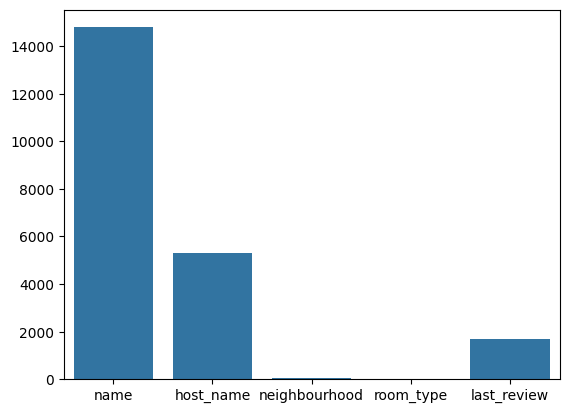

In [ ]:
# Menampilkan visualisasi jumlah data di masing-masing variabel kategorik
sns.barplot(kategorik.nunique())

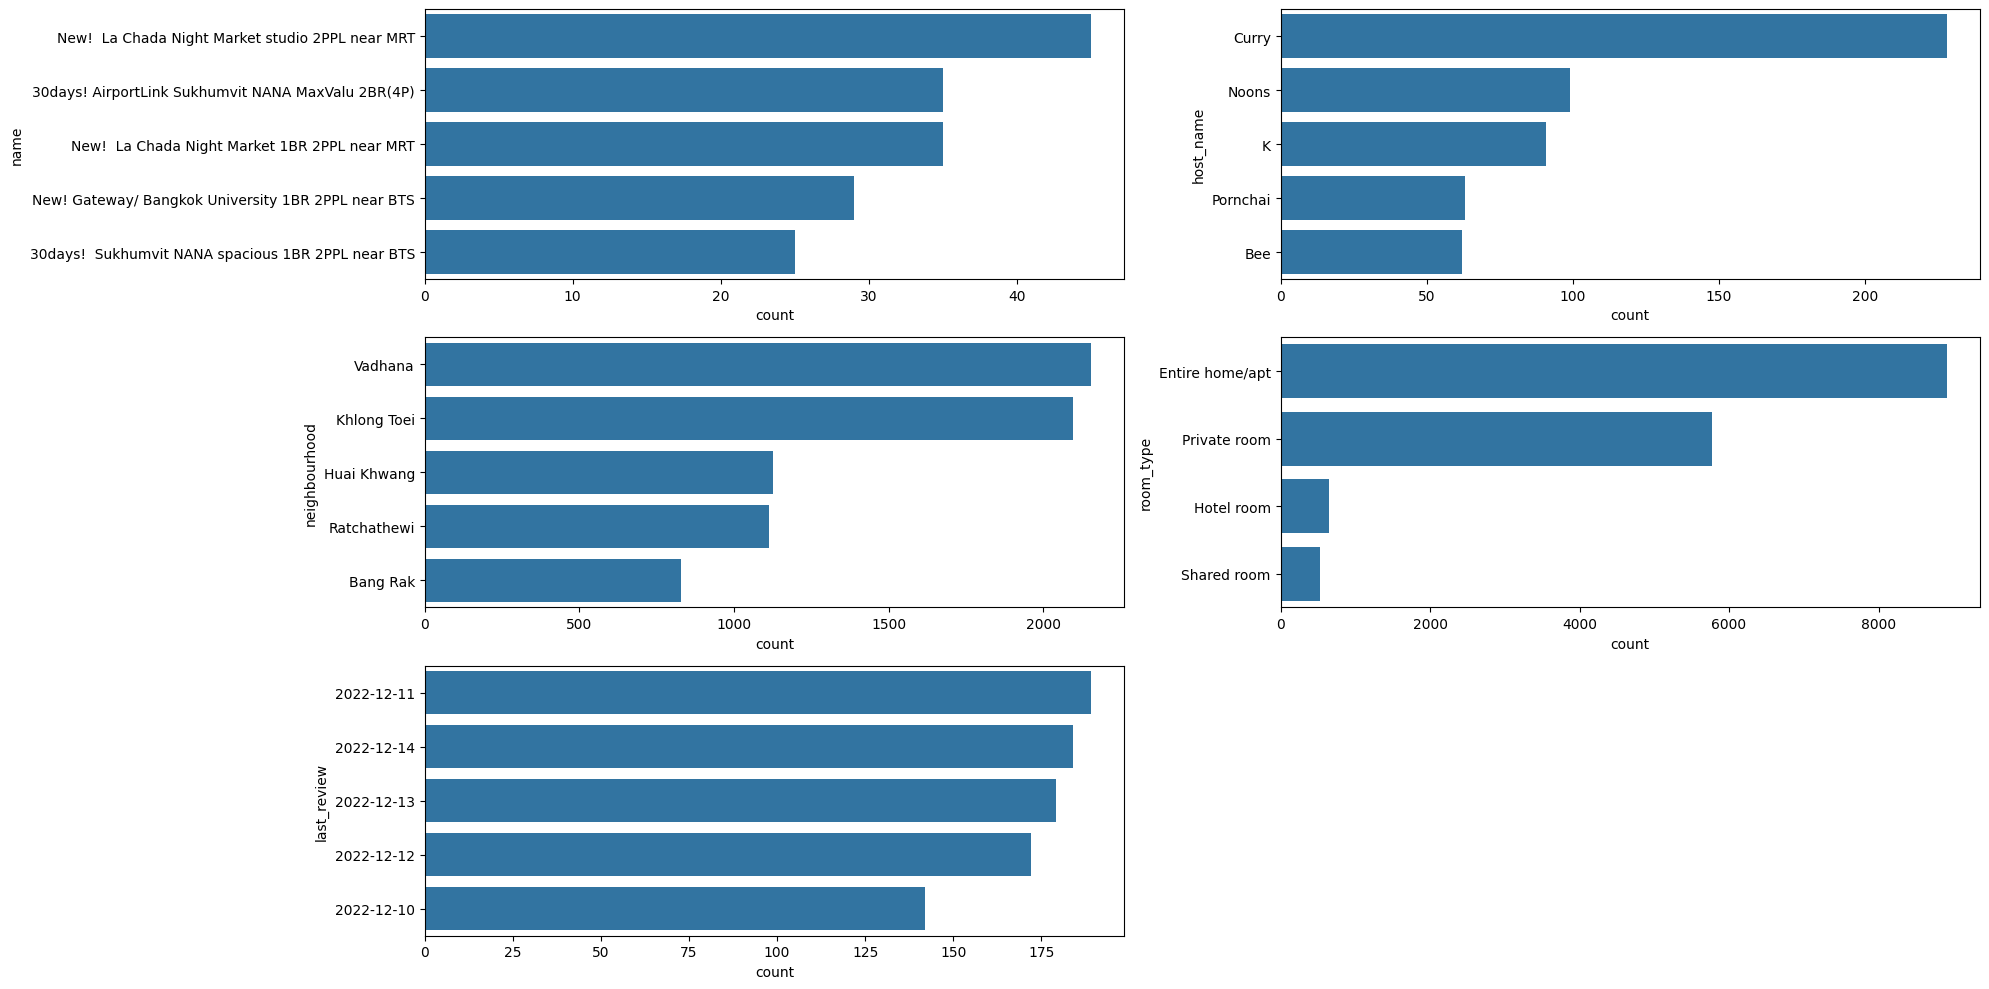

In [ ]:
plt.figure(figsize = (20,10))

posisi = 1
for setiap_kolom in kategorik.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(3,2,posisi)
    sns.barplot(df[setiap_kolom].value_counts().head(5), orient = 'h')
    posisi = posisi + 1

    plt.tight_layout()

## Menentukan Tabel Analisis

Berdasarkan Latar Belakang Permasalahan, Rumusan Masalah dan Data Dictionary, maka digunakan tabel yang paling relevan untuk melakukan analisis sebagai berikut:

1. Price

    Kolom numerik ini digunakan untuk mengetahui harga kamar di masing-masing tipe kamar di wilayah tertentu.
    Harga juga sangat penting saat akan menentukan harga yang optimal sesuai dengan tujuan yang akan dicapai yaitu menentukan harga optimal untuk masing-masing kamar (room).

2. Number_of_review

    Tabel numerik ini merupakan tabel yang paling relevan untuk digunakan sebagai dasar penentuan suatu kamar diminati oleh customer. Diasumsikan bahwa semakin banyak jumlah review, maka semakin banyak pula pelanggan yang tertarik menginap di kamar tersebut.
    Kemudian angka number_of_review ini akan dijadikan dasar dalam penentuan suatu kamar diminati oleh customer/tamu.

3. Room_type

    Tabel kategorik ini digunakan untuk menganalisis bagaimana suatu tipe kamar diminati di wilayah tersebut. Tipe kamar memeiliki karakteristik yang berbeda sesuai yang dideskripsikan di Data Dictionary. Jika melihat ke tujuan dan rumusan masalah, maka tabel ini akan sangat penting untuk penentuan tipe kamar yang akan dibangun untuk Airbnb yang baru.

4. Neighbourhood

    Tabel kategorik ini digunakan untuk menentukan wilayah pembangunan Airbnb baru berikutnya dengan mempertimbangkan data historis yang sudah ada.
    Dengan mengetahui bagaimana suatu Airbnb yang sudah berjalan sebelumnya di suatu wilayah, maka diharapkan dapat memberikan informasi sebagai dasar dalam menentukan wilayah pembangunan Airbnb yang baru.

# DATA CLEANING

## Handling Missing Values

Berdasarkan Database, Missing Values hanya terdapat pada 4 kolom yaitu kolom 'last_review' , 'reviews_per_month', 'name' dan 'host_name'
Berikut akan dijelaskan satu per satu untuk handling masing-masing kolom:




### Kolom Last_Review dan Reviews_per_month

Terdapat 5790 data kosong untuk masing-masing kolom ini, artinya 36,52% data tidak terisi dari total baris data yang ada.
Dalam hal ini dapat dilihat bahwa missing values sangat banyak dan hal yang paling tepat dilakukan adalah dengan menghapus dua kolom tersebut. Kolom dihapus dengan mempertimbangkan hal berikut:

1. Kepentingan Kolom: dua kolom yang memiliki banyak missing values tersebut tidak krusial untuk analisis yang ingin dilakukan, maka menghapus kolom tersebut menjadi opsi yang tepat.

2. Kolom yang dimaksud tidak memberikan kontribusi signifikan atau justru membuat analisis menjadi kurang efektif karena banyaknya missing values.

In [ ]:
df = df.drop(columns=['last_review', 'reviews_per_month'])
df

,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,Entire home/apt,1905,3,65,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,Private room,1316,1,0,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,Private room,800,60,0,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Private room,1286,7,2,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,Private room,1905,1,0,3,365,0
...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,Private room,2298,28,0,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,Phakhamon,Ratchathewi,Private room,1429,1,0,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,Private room,1214,1,0,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,Private room,1214,1,0,14,365,0


### Kolom Name dan Host_name

Missing Value tergolong sedikit pada variabel 'name' dan 'host_name', masing-masing 0,05% dan 0,01%.
Ada 8 kolom kosong untuk name dan 1 kolom kosong untuk name.
Missing Values ini akan ditangani dengan pengisian 'unknown' di masing-masing kolom kosong, yang artinya belum diketahui isi baris tersebut. Pengisian ini didasarkan pada:
1. Jumlah baris yang kosong sedikit, sehingga dibiarkan tetap terisi kosong tidak akan mempengaruhi pengolahan data secara signifikan.
2. Secara spesifik kolom name dan host_name tidak digunakan dalam analisis data berdasarkan penentuan tabel analisis, sehingga pengisian dengan unknown sudah cukup karena tidak akan berpengaruh terhadap hasil analisis data.

In [ ]:
# Mengganti NaN di kolom 'name' dan 'host_name' dengan 'unknown'
df['name'] = df['name'].fillna('unknown')
df['host_name'] = df['host_name'].fillna('unknown')
df

,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Nice room with superb city view,Nuttee,Ratchathewi,Entire home/apt,1905,3,65,2,353,0
1,"Easy going landlord,easy place",Emy,Bang Na,Private room,1316,1,0,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,Private room,800,60,0,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Private room,1286,7,2,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,Private room,1905,1,0,3,365,0
...,...,...,...,...,...,...,...,...,...,...
15849,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,Renee,Pra Wet,Private room,2298,28,0,1,362,0
15850,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,Phakhamon,Ratchathewi,Private room,1429,1,0,14,365,0
15851,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,Private room,1214,1,0,14,365,0
15852,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,Phakhamon,Ratchathewi,Private room,1214,1,0,14,365,0


In [ ]:
# Menampilkan baris dengan nilai 'unknown' di kolom 'name' atau 'host_name'
unknown_entries = df[(df['name'] == 'unknown') | (df['host_name'] == 'unknown')]
unknown_entries

,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,unknown,Titawan,Phra Khanong,Private room,1080,5,0,1,365,0
544,unknown,Cherry,Din Daeng,Private room,1200,1,0,1,365,0
572,unknown,Parichart,Bang Phlat,Private room,1200,1,0,1,365,0
669,unknown,Chira,Bang Na,Entire home/apt,2424,2,0,1,365,0
1030,unknown,Nantida,Vadhana,Private room,5000,3,0,1,365,0
1282,unknown,Diamond Bangkok,Ratchathewi,Private room,930,1,6,1,365,0
1594,unknown,Khaneungnit,Vadhana,Private room,1000,1,0,1,365,0
2075,unknown,Pakaphol,Khlong Toei,Private room,850,1,2,3,220,0
3571,Cozy Hideaway,unknown,Bang Kapi,Private room,1399,3,1,1,365,0


## Handling Outliers

Dalam handling ouliers, akan fokus pada 4 tabel yang relevan digunakan untuk analisis data nantinya.


### Handling Outliers di Kolom Numerik (number_of_reviews dan price)

Untuk kolom number_of_reviews dan price, akan digunakan metode Interquartile Range (IQR) untuk mendeteksi dan menangani outliers.

Interquartile Range (IQR) Method: IQR adalah metode statistik yang umum digunakan untuk mendeteksi outliers dalam data. IQR dihitung sebagai selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1). Outliers umumnya dianggap sebagai data yang berada di luar rentang berikut:

Batas bawah: Q1 - 1.5 * IQR
Batas atas: Q3 + 1.5 * IQR

#### Handling Outliers Number_of_reviews

In [ ]:
# Menghitung Q1 (25th percentile) dan Q3 (75th percentile) untuk kolom numerik
Q1_reviews = df['number_of_reviews'].quantile(0.25)
Q3_reviews = df['number_of_reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews

# Menentukan batas bawah dan atas untuk outliers
lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

df = df[(df['number_of_reviews'] >= lower_bound_reviews) & (df['number_of_reviews'] <= upper_bound_reviews)]

print("Jumlah data setelah menangani outliers adalah:")
print(df.shape)

Jumlah data setelah menangani outliers adalah:
(13614, 10)


**Dapat dilihat bahwa setelah dilakukan handling outlier, baris data berkurang dari 15854 menjadi 13614, artinya ads 2.240 outliers data yang dihapus.**


Proses ini berguna untuk mengurangi pengaruh data ekstrem yang dapat merusak analisis statistik dan model prediksi.
Dengan menghapus outliers, dapat memastikan bahwa analisis Anda lebih representatif dari data yang "normal" dan tidak terpengaruh oleh nilai yang tidak biasa.

#### Handling Outliers Price

Dalam Handling Outliers di kolom harga akan sedikit berbeda karena mempertimbangkan asumsi bahwa harga di masing-masing kategori tipe kamar akan berbeda. Hal ini tentu akan berpengaruh terhadap terhadap distribusi price. Untuk menguji perbedaan ini akan dilakukan uji Kruskal-Wallis karena data terdistribusi tidak normal. Uji ini dilakukan untuk mengetahui apakah ada perbedaan signifikan untuk harga masing-masing tipe kamar

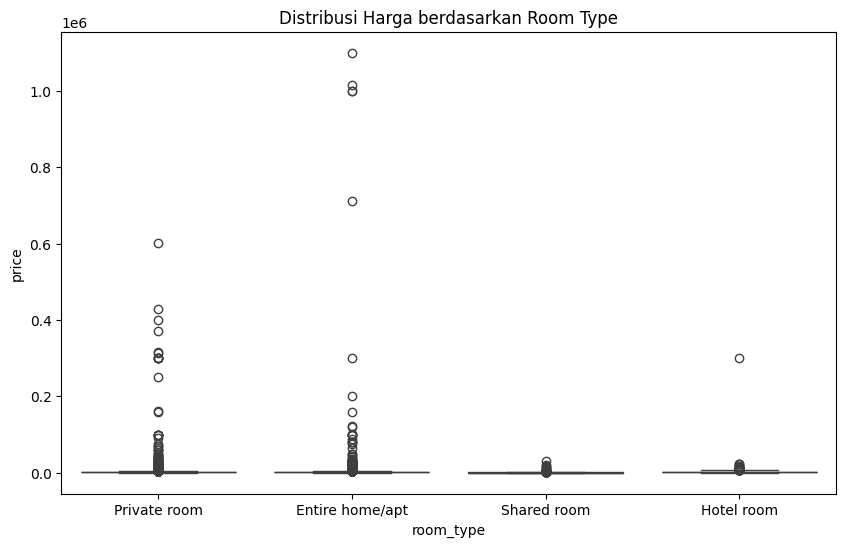

Kruskal-Wallis test result: KruskalResult(statistic=1038.2118842266657, pvalue=9.239630074134067e-225)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Visualisasi boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Distribusi Harga berdasarkan Room Type')
plt.show()

# Mendapatkan daftar unik room types
room_types = df['room_type'].unique()

# Uji Kruskal-Wallis untuk melihat perbedaan signifikan
kruskal_result = kruskal(*(df[df['room_type'] == rt]['price'] for rt in room_types))
print(f"Kruskal-Wallis test result: {kruskal_result}")


Hasil uji Kruskal-Wallis yang didapatkan menunjukkan:

Statistik Uji: 1038.21

P-value:
9.24
×
1
0
−
225
9.24×10
−225

Interpretasi:

Statistik Uji: Nilai ini menunjukkan ukuran perbedaan antara grup. Semakin tinggi nilai statistik, semakin besar perbedaan antara grup-grup yang diuji.

P-value: Nilai p sangat kecil (
<
0.05
<0.05), yang menunjukkan bahwa perbedaan harga antara tipe kamar yang berbeda sangat signifikan secara statistik. Dengan kata lain, ada bukti yang sangat kuat bahwa harga berbeda di antara berbagai tipe kamar.

Kesimpulan:

Karena p-value jauh lebih kecil dari tingkat signifikansi yang umum digunakan (misalnya 0.05), dapat disimpulkan bahwa terdapat perbedaan yang signifikan dalam harga antara tipe kamar yang berbeda. Dengan kata lain, tipe kamar mempengaruhi harga secara signifikan.

**Berdasarkan hasil uji di atas, maka penanganan ouliers price akan dilakukan di masing-masing tipe kamar secara terpisah**

In [ ]:
# Mengetahui kategori unik di kolom room_type
room_types = df['room_type'].unique()
room_types

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
# DataFrame kosong untuk menyimpan data yang telah dibersihkan
df_cleaned = pd.DataFrame()

for room_type in room_types:
    # Filter data untuk tipe kamar tertentu
    df_room_type = df[df['room_type'] == room_type]

    # Hitung Q1, Q3, dan IQR untuk 'price'
    Q1_price = df_room_type['price'].quantile(0.25)
    Q3_price = df_room_type['price'].quantile(0.75)
    IQR_price = Q3_price - Q1_price

    # Menentukan batas bawah dan atas untuk outliers
    lower_bound_price = Q1_price - 1.5 * IQR_price
    upper_bound_price = Q3_price + 1.5 * IQR_price

    # Filter data berdasarkan batas outliers
    df_room_type_cleaned = df_room_type[(df_room_type['price'] >= lower_bound_price) & (df_room_type['price'] <= upper_bound_price)]

    # Menggabungkan data yang telah dibersihkan ke DataFrame utama
    df_cleaned = pd.concat([df_cleaned, df_room_type_cleaned])

# Tampilkan jumlah data setelah penanganan outliers
print("Jumlah data setelah menangani outliers untuk masing-masing tipe kamar:")
print(df_cleaned.shape)

Jumlah data setelah menangani outliers untuk masing-masing tipe kamar:
(12346, 10)


**Dapat dilihat bahwa setelah dilakukan handling outlier, baris data berkurang dari 13614 menjadi 12346, artinya ads 1.268 outliers data yang dihapus.**

### Handling Outliers di Kolom Kategorik (neighbourhood dan room_type)


Untuk kolom kategorik seperti neighbourhood dan room_type, tidak dicari outliers seperti di data numerik. Namun, hanya memastikan tidak ada kesalahan dalam entri atau kategori langka yang mungkin perlu penanganan khusus.

In [ ]:
# Meninjau frekuensi entri di kolom 'neighbourhood' dan 'room_type'
print("Frekuensi nilai di kolom 'neighbourhood':")
print(df_cleaned['neighbourhood'].value_counts())

print("\nFrekuensi nilai di kolom 'room_type':")
print(df_cleaned['room_type'].value_counts())


Frekuensi nilai di kolom 'neighbourhood':
neighbourhood
Khlong Toei             1553
Vadhana                 1469
Huai Khwang              906
Ratchathewi              872
Sathon                   613
Bang Rak                 602
Phra Nakhon              513
Phra Khanong             487
Chatu Chak               457
Bang Na                  375
Din Daeng                371
Suanluang                324
Parthum Wan              314
Phaya Thai               295
Khlong San               275
Bang Kapi                235
Bang Phlat               199
Bang Sue                 191
Yan na wa                153
Thon buri                143
Pra Wet                  141
Don Mueang               140
Phasi Charoen            138
Lat Krabang              124
Bangkok Noi              123
Lak Si                   115
Bang Khen                111
Bang Kho laen             98
Wang Thong Lang           91
Samphanthawong            88
Bang Khae                 85
Dusit                     79
Pom Prap Sattru 

**Berdasarkan hasil peninjauan frekuensi untuk masing-masing value di kolom kategorik 'neighbourhood' dan 'room_type', maka dapat dilihat bahwa tidak ada kesalahan entri atau kategori yang langka.**
**Value di wilayah menunjukan perbedaan nama wilayah yang signifikan dan bukan hasil salah entri, begitupun di kolom tipe kamar.**
**Jumlah masing-masing value lebih dari satu sehingga kecil kemungkinan ada kesalahan input secara berulang lebih dari satu untuk satu nama wilayah/tipe kamar.**

## Data Bersih

In [ ]:
df_cleaned

,name,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,"Easy going landlord,easy place",Emy,Bang Na,Private room,1316,1,0,2,358,0
2,modern-style apartment in Bangkok,Familyroom,Bang Kapi,Private room,800,60,0,1,365,0
3,Spacious one bedroom at The Kris Condo Bldg. 3,Sirilak,Din Daeng,Private room,1286,7,2,1,323,1
4,Suite Room 3 at MetroPoint,Kasem,Bang Kapi,Private room,1905,1,0,3,365,0
6,Condo with Chaopraya River View,Athitaya,Rat Burana,Private room,1558,3,1,1,365,0
...,...,...,...,...,...,...,...,...,...,...
8983,Mind Day Hostel Khaosan - 12 Mixed Dormitory,Mindday,Phra Nakhon,Hotel room,318,1,2,6,365,0
9040,1BR Suite with Balcony for 3 Adults - Asok Sta...,Admiral Premier,Vadhana,Hotel room,4000,1,0,17,363,0
9124,Amber Deluxe RO Great Location-2 Steps BTS NANA,Panitchaya,Khlong Toei,Hotel room,4099,1,1,22,359,0
9145,Super Comfy Capsule Bed in Female Dorm | Sukhu...,Patsiri,Khlong Toei,Hotel room,350,1,1,15,361,0


# **EXPLORATORY DATA ANALYSIS**

## Menentukan Wilayah yang tepat

### Apakah ada Korelasi antara wilayah dan number_of_review (Analisis Korelasi 'Neighbourhood dan Number_of_review)


Menganalisis Korelasi antara neighbourhood dan number_of_review:
Karena data terdistribusi tidak normal, akan digunakan uji korelasi yang ideal untuk non-parametrik yaitu Kruskal-Wallis untuk melihat apakah ada hubungan antara neighbourhood dan number_of_review.

In [ ]:
#Mendapatkan nilai unik dari neighbourhood
neighbourhoods = df_cleaned['neighbourhood'].unique()

# Membuat list untuk setiap 'number_of_reviews' berdasarkan 'neighbourhood'
data = [df_cleaned[df_cleaned['neighbourhood'] == nb]['number_of_reviews'] for nb in neighbourhoods]

# Lakukan uji Kruskal-Wallis H
stat, p_value = kruskal(*data)

print(f"Kruskal-Wallis H test statistic: {stat}")
print(f"P-value: {p_value}")

Kruskal-Wallis H test statistic: 618.1667784336985
P-value: 1.6498635940410888e-99



**Hasil uji Kruskal-Wallis menunjukkan nilai statistik sebesar 618.17 dan p-value yang sangat kecil (1.65e-99). Ini berarti bahwa terdapat perbedaan yang signifikan secara statistik pada harga di antara berbagai tipe kamar (room_type). Dengan p-value yang jauh lebih kecil dari tingkat signifikansi umum (misalnya, 0.05), hipotesis nol dapat ditolak bahwa median harga di antara tipe kamar adalah sama.**

### Penentuan wilayah yang tepat berdasarkan number_of_review

Penentuan wilayah ekspansi yang tepat akan menggunakan data neighbourhood dan number_of_reviews. Di sini akan diasumsikan bahwa number_of_review semakin banyak di suatu wilayah, maka Airbnb di wilayah tersebut semakin diminati oleh tamu.


Menentukan Wilayah berdasarkan number_of_reviews
Untuk penentuan wilayah yang paling diminati berdasarkan number_of_reviews merupakan langkah yang masih relevan dan signifikan. Selain adanya korelasi tinggi setelah dilakukan uji Kruskal Wallis, memilih wilayah dengan jumlah ulasan terbanyak masih memberikan wawasan tentang area mana yang menarik perhatian lebih banyak tamu.

Alasan Mengapa Ini Signifikan:

1. Popularitas Wilayah: Menentukan wilayah dengan number_of_reviews terbanyak dapat memberikan informasi tentang popularitas atau daya tarik wilayah tertentu di Bangkok. Ini penting bagi bisnis untuk menargetkan wilayah-wilayah yang diminati.

2. Perencanaan Ekspansi: Memahami wilayah dengan aktivitas ulasan yang tinggi dapat membantu dalam perencanaan ekspansi atau investasi, terutama jika bisnis bertujuan untuk menarik lebih banyak tamu atau meningkatkan visibilitas di wilayah-wilayah tertentu.

3. Strategi Pemasaran: Dengan mengetahui wilayah yang paling banyak diulas, maka perusahaan pemilik properti dapat menyesuaikan strategi pemasaran mereka untuk fokus pada wilayah-wilayah ini, meningkatkan promosi, atau menyesuaikan harga.

Selanjutnya akan diambil 10 wilayah dengan tingkat popularitas tertinggi berdasarkan number_of_review sebagai alternatif dalam penentuan wilayah yang tepat.
Berdasarkan data understanding variabel neighbourhood cukup banyak sehingga hanya akan diambil 10 alternatif terbaik agar penentuan wilayah semakin spesifik. Selain itu,

#### Menentukan 10 wilayah terbaik dengan menghitung number_of_reviews terbanyak

In [ ]:
# Menentukan 10 wilayah dengan number_of_review terbanyak
top_neighbourhoods = df_cleaned.groupby('neighbourhood')['number_of_reviews'].sum().nlargest(10)
top_neighbourhoods

,number_of_reviews
neighbourhood,
Khlong Toei,10763
Vadhana,7337
Ratchathewi,4713
Huai Khwang,4185
Sathon,3550
Bang Rak,3382
Phra Nakhon,2422
Chatu Chak,2132
Phra Khanong,2025


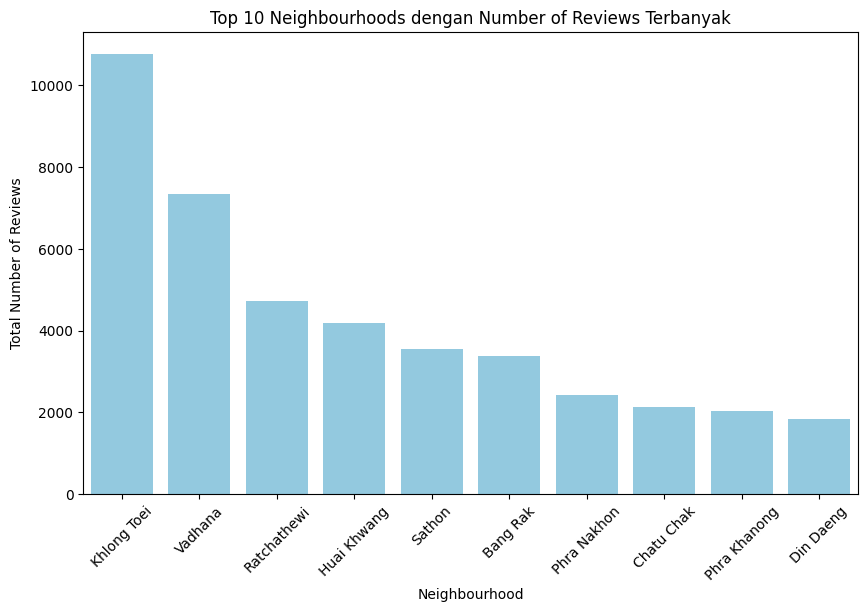

In [ ]:
# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighbourhoods.index, y=top_neighbourhoods.values, color='skyblue')
plt.title('Top 10 Neighbourhoods dengan Number of Reviews Terbanyak')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)

# Menambahkan judul dan label
plt.title('Top 10 Neighbourhoods dengan Number of Reviews Terbanyak')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()


**Berdasarkan hasil perhitungan jumlah number_of_reviews terbanyak, wilayah yang paling tepat dilakukan ekspansi adalah Khlong Toei. Kemudian untuk alternatif lain wilayah yang paling tepat adalah Vadhana, Ratchathewi, Huai Khwang, Sathon, Bang Rak, Phra Nakhon, Chatu Chak, Phra Khanong dan Din Daeng.**


**Artinya untuk menentukan wilayah ekpansi Aribnb baru akan optimal jika berada di 10 wilayah tersebut.**
**Penentuan wilayah ini mungkin akan dipengaruhi oleh faktor lain di luar data yang diketahui. Namun setidaknya cukup mewakili untuk pengambilan keputusan wilayah.**

## Menentukan Tipe Kamar yang Tepat


Untuk menentukan tipe kamar yang tepat di wilayah yang telah dipilih, maka akan dilakukan analisis berikut:

Langkah-langkah Analisis Penentuan Tipe Kamar

1. Mengumpulkan Data Tipe Kamar:
Fokus pada data yang berkaitan dengan room_type dan price untuk wilayah yang terpilih.
2. Analisis Harga Berdasarkan Tipe Kamar:
3. Menghitung rata-rata harga per tipe kamar untuk setiap wilayah.
Menilai variasi harga per tipe kamar untuk memahami rentang harga yang mungkin diterima oleh pasar di wilayah tersebut.
4. Analisis Popularitas Tipe Kamar:
Menghitung jumlah ulasan per tipe kamar untuk masing-masing wilayah.
Menilai tipe kamar yang paling banyak diulas atau paling sering dibooking untuk setiap wilayah.
5. Analisis Korelasi Tipe Kamar dengan Jumlah Ulasan:
Menggunakan uji statistik atau visualisasi untuk melihat apakah tipe kamar tertentu memiliki hubungan yang signifikan dengan jumlah ulasan.
6. Visualisasi Data:
Membuat visualisasi seperti bar plot atau box plot untuk membandingkan harga dan jumlah ulasan antara tipe kamar di wilayah terpilih.

### Mengumpulkan Data Tipe Kamar

Berdasarkan data wilayah terpilih, maka analisis berikutnya akan ditentukan data dari top 10 wilayah paling tepat.
Kemudian dataframe akan diubah ke variabel df_cleaned_neighbourhoods.



In [ ]:
# Filter data untuk wilayah yang terpilih
selected_neighbourhoods = ['Khlong Toei', 'Vadhana', 'Ratchathewi', 'Huai Khwang', 'Sathon',
                            'Bang Rak', 'Phra Nakhon', 'Chatu Chak', 'Phra Khanong', 'Din Daeng']
df_cleaned_neighbourhoods = df_cleaned[df_cleaned['neighbourhood'].isin(selected_neighbourhoods)]

### Analisis Korelasi Tipe Kamar dengan Jumlah Ulasan:

In [ ]:
# Uji Kruskal-Wallis H untuk melihat apakah ada perbedaan signifikan jumlah ulasan antar tipe kamar
room_types = df_cleaned_neighbourhoods['room_type'].unique()
data = [df_cleaned_neighbourhoods[df_cleaned_neighbourhoods['room_type'] == rt]['number_of_reviews'] for rt in room_types]
stat, p_value = kruskal(*data)

print(f"Kruskal-Wallis H test statistic: {stat}")
print(f"P-value: {p_value}")

Kruskal-Wallis H test statistic: 481.41441366668505
P-value: 5.084956612908748e-104


Hasil uji Kruskal-Wallis menunjukkan statistik uji sebesar 481.414 dan p-value sebesar 5.084956612908748e-104. Berikut adalah interpretasi hasil tersebut:


**Interpretasi Hasil Uji Kruskal-Wallis:**

Statistik Uji (Kruskal-Wallis H Test Statistic = 481.414):
Nilai statistik uji yang besar ini mengindikasikan bahwa ada perbedaan yang signifikan antara grup-grup yang diuji. Semakin besar nilai statistik uji Kruskal-Wallis, semakin besar kemungkinan adanya perbedaan di antara grup-grup.

P-value (5.084956612908748e-104):

P-value yang sangat kecil (lebih kecil dari 0.05, bahkan jauh lebih kecil dari 0.01) menunjukkan bahwa perbedaan di antara grup-grup tersebut adalah sangat signifikan secara statistik.

Dalam konteks ini, dapat menolak hipotesis nol (H0) yang menyatakan bahwa tidak ada perbedaan median yang signifikan antara grup-grup yang diuji.

**Kesimpulan:**
**Perbedaan Signifikan: Hasil ini menunjukkan bahwa ada perbedaan yang sangat signifikan dalam distribusi harga antara tipe kamar yang berbeda (room_type), berdasarkan harga (price). Artinya, median harga di antara tipe kamar berbeda secara signifikan.**


### Analisis Popularitas Tipe Kamar

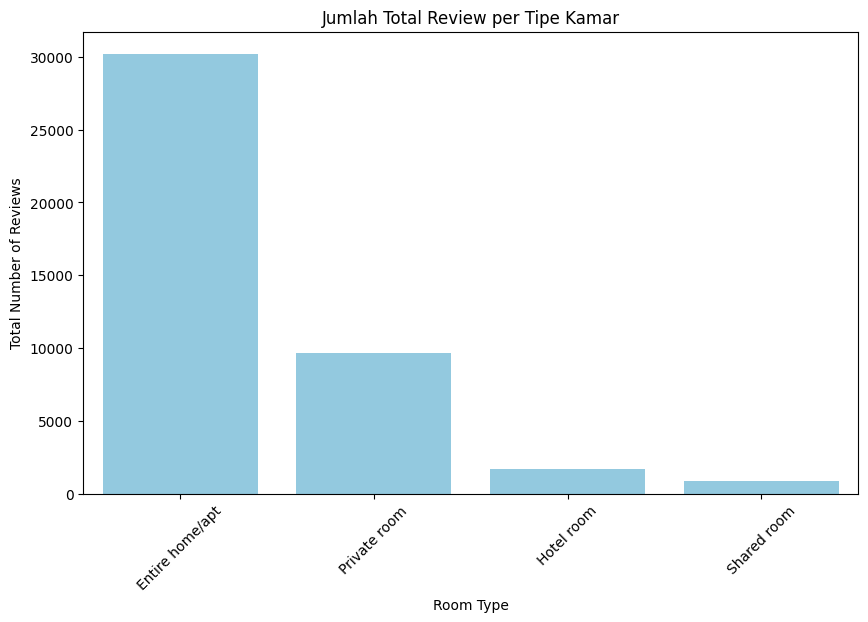

In [ ]:
# Menghitung total ulasan berdasarkan tipe kamar
popularitas_tipe_kamar = df_cleaned_neighbourhoods.groupby('room_type')['number_of_reviews'].sum()

# Mengurutkan data berdasarkan jumlah ulasan (descending)
popularitas_tipe_kamar = popularitas_tipe_kamar.sort_values(ascending=False)

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=popularitas_tipe_kamar.index, y=popularitas_tipe_kamar.values, color='skyblue')
plt.title('Jumlah Total Review per Tipe Kamar')
plt.xlabel('Room Type')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.show()

**Berdasarkan Bar Plot yang telah dibuat, dapat dilihat bahwa Entire home/apt menjadi tipe kamar yang paling populer dilihat dari jumlah ulasannya. Kemudian diikuti tipe Private room, hotel room dan shared room.**

### Penentuan Tipe Kamar yang Tepat


In [ ]:
# Menghitung jumlah ulasan untuk masing-masing tipe kamar
df_room_type = df_cleaned_neighbourhoods.groupby('room_type')['number_of_reviews'].sum()


df_room_type.sort_values(ascending=False)

,number_of_reviews
room_type,
Entire home/apt,30229
Private room,9628
Hotel room,1652
Shared room,848


**Berdasarkan Popularitas kamar dan Bar Plot yang telah dibuat, dapat dilihat bahwa Entire home/apt menjadi tipe kamar yang paling populer dilihat dari jumlah ulasannya. Kemudian alternatif lain yang paling populer adalah Private room, diikuti hotel room dan shared room.**

**Perusahaan seharusnya melakukan ekspansi di wilayah terpilih dengan memprioritaskan tipe kamar Entire home/apt. Namun jika menginginkan adanya variasi, maka private room dapat menjadi pilihan berikutnya diikuti dengan hotel room dan shared room sebagai pilihan terkahir.**

## Menentukan Harga yang Optimal

### Deskriptif Statistik Harga

In [ ]:
# Menghitung statistik deskriptif harga untuk masing-masing tipe kamar
deskripsi_harga = df_cleaned_neighbourhoods.groupby('room_type')['price'].describe()

deskripsi_harga

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,4455.0,1802.888664,942.090118,332.0,1097.5,1543.0,2277.0,4918.0
Hotel room,357.0,1992.397759,1458.369173,0.0,986.0,1600.0,2583.0,6413.0
Private room,2708.0,1534.340473,883.203468,315.0,890.0,1282.0,1990.0,4263.0
Shared room,323.0,501.659443,153.018455,280.0,390.0,486.0,550.0,1000.0


### Uji Signifikansi Harga

Sebelum melakukan uji signifikasi harga, perlu melakukan uji normalitas terhadap data yang sudah di cleaning untuk menentukan uji normalitas yang sesuai.

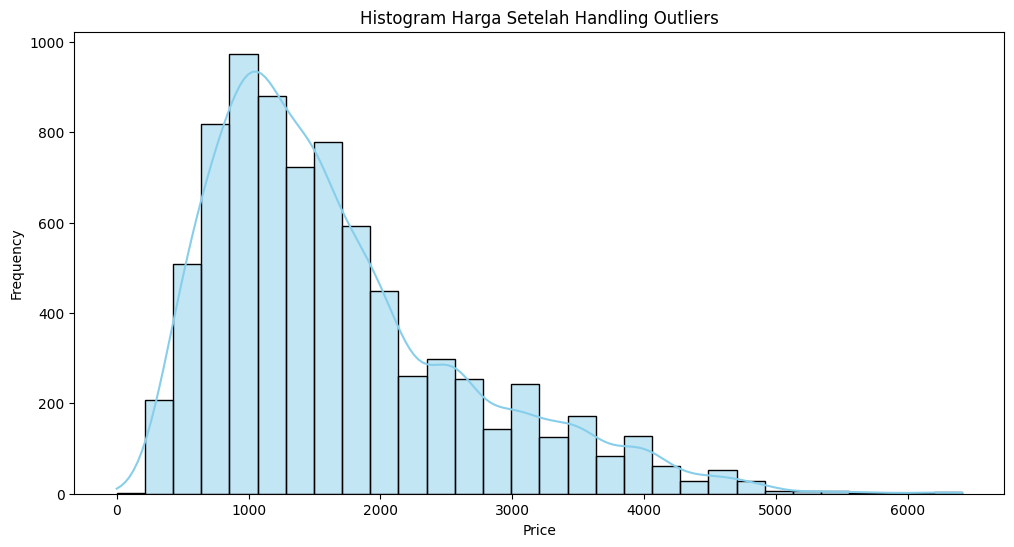

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned_neighbourhoods['price'], kde=True, bins=30, color='skyblue')
plt.title('Histogram Harga Setelah Handling Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Berdasarkan hasil uji normalitas data yang sudah dibersihkan ouliers nya, data masih terdistribusi tidak normal, maka uji Kruskal-Wallis menjadi pilihan yang tepat untuk melihat apakah ada perbedaan signifikan untuk harga di masing-masing kamar.**

In [ ]:
# Melakukan uji Kruskal-Wallis terlebih dahulu
kruskal_stat, kruskal_p = kruskal(
    *[group["price"].values for name, group in df_cleaned_neighbourhoods.groupby("room_type")]
)

print(f"Kruskal-Wallis H test statistic: {kruskal_stat}")
print(f"P-value: {kruskal_p}")

Kruskal-Wallis H test statistic: 983.7613515975474
P-value: 5.994631309946457e-213


**Hasil uji Kruskal-Wallis menunjukkan statistik uji sebesar 983.761 dan p-value sebesar 5.994631309946457e-213.**

**Interpretasi Hasil Uji Kruskal-Wallis:**

Statistik Uji (Kruskal-Wallis H Test Statistic = 983.761):

Nilai statistik uji yang sangat besar ini menunjukkan bahwa terdapat perbedaan yang signifikan antara grup-grup yang diuji. Semakin besar nilai statistik uji Kruskal-Wallis, semakin besar kemungkinan adanya perbedaan di antara grup-grup tersebut.

P-value (5.994631309946457e-213):

P-value yang sangat kecil (bahkan jauh lebih kecil dari 0.05) menunjukkan bahwa hasil ini sangat signifikan secara statistik.
Dengan p-value sebesar ini, kita dapat dengan sangat yakin menolak hipotesis nol (H0) yang menyatakan bahwa tidak ada perbedaan median yang signifikan antara grup-grup yang diuji. Dengan kata lain, ada bukti yang sangat kuat bahwa setidaknya satu pasang grup memiliki perbedaan median yang signifikan.

Kesimpulan:

**Perbedaan Signifikan: Hasil ini menunjukkan bahwa terdapat perbedaan yang sangat signifikan dalam distribusi harga di antara berbagai tipe kamar (room_type) berdasarkan harga (price). Artinya, median harga berbeda secara signifikan di antara tipe kamar yang diuji.**

### Analisis Harga berdasarkan tipe kamar

#### Menentukan Harga Optimal Masing-Masing Tipe Kamar

Data terdistibusi tidak normal, sehingga penggunaan median sebagai sentral tendency menjadi pilihan yang tepat.

In [ ]:
# Menghitung median harga per tipe kamar
median_harga_per_tipe_kamar = df_cleaned_neighbourhoods.groupby('room_type')['price'].median()

print("Median Price per Tipe Kamar:\n")
median_harga_per_tipe_kamar.sort_values()

Median Price per Tipe Kamar:



,price
room_type,
Shared room,486.0
Private room,1282.0
Entire home/apt,1543.0
Hotel room,1600.0


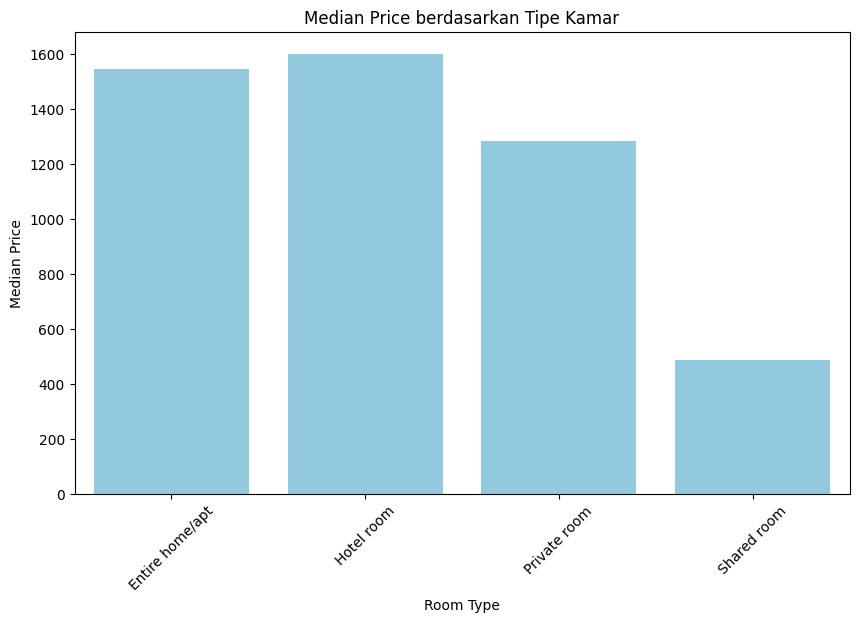

In [ ]:
# Membuat bar plot dengan data yang sudah diurutkan
plt.figure(figsize=(10, 6))
sns.barplot(x=median_harga_per_tipe_kamar.index, y=median_harga_per_tipe_kamar.values,  color='skyblue')
plt.title('Median Price berdasarkan Tipe Kamar')
plt.xlabel('Room Type')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

#### Menentukan Rentang Harga yang Optimal

Rentang harga yang signifikan dapat ditentukan sebagai kuartil pertama (25%) hingga kuartil ketiga (75%). Ini adalah rentang di mana sebagian besar data berada dan biasanya dianggap representatif karena tidak dipengaruhi oleh outliers.

In [ ]:
# Menentukan batas bawah dan batas atas harga untuk masing-masing tipe kamar menggunakan IQR
rentang_harga = df_cleaned_neighbourhoods.groupby('room_type')['price'].agg(
    lambda x: (x.quantile(0.25), x.quantile(0.75))
)
print("\nRentang Harga Berdasarkan Tipe Kamar (25% - 75%):\n")
rentang_harga.sort_values()


Rentang Harga Berdasarkan Tipe Kamar (25% - 75%):



,price
room_type,
Shared room,"(390.0, 550.0)"
Private room,"(890.0, 1990.0)"
Hotel room,"(986.0, 2583.0)"
Entire home/apt,"(1097.5, 2277.0)"


<ipython-input-62-1d07bcd87d2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_type', y='price', data=df_cleaned_neighbourhoods, palette="viridis")


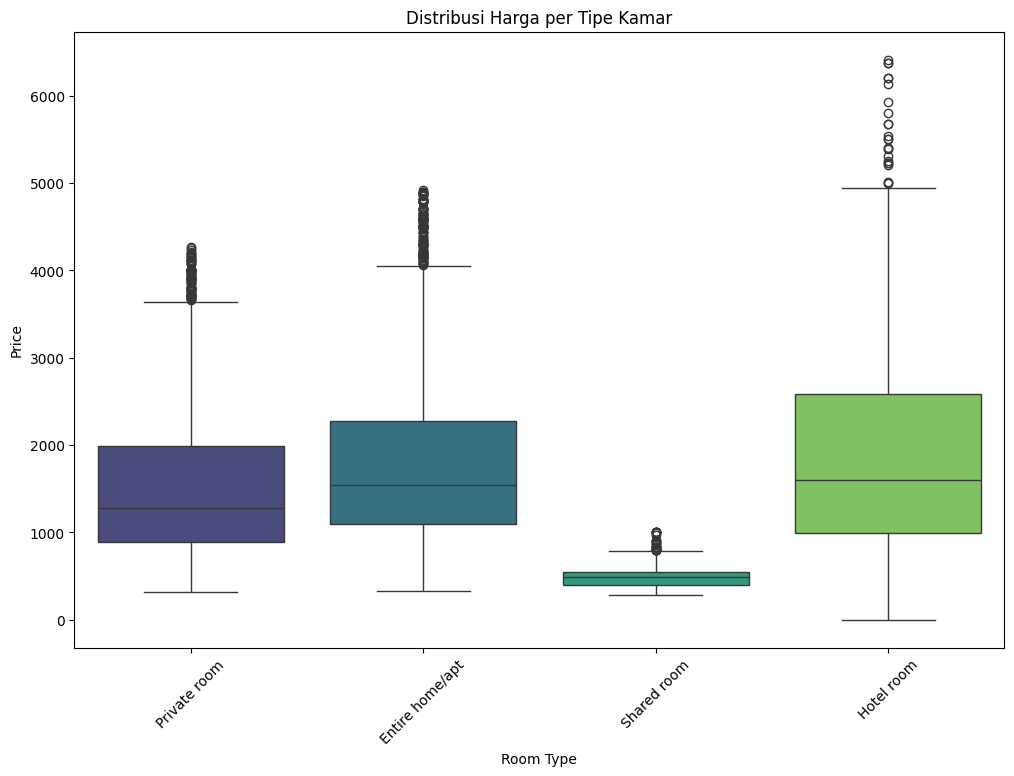

In [ ]:
# Visualilasi Distribusi Harga Berdasarkan Tipe Kamar
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='price', data=df_cleaned_neighbourhoods, palette="viridis")
plt.title('Distribusi Harga per Tipe Kamar')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Penentuan Harga yang Optimal

In [ ]:
# Menghitung statistik deskriptif, termasuk median, untuk setiap tipe kamar
statistik_harga = df_cleaned_neighbourhoods.groupby('room_type')['price'].agg(
    Lower_Q1=lambda x: x.quantile(0.25),
    Median='median',
    Upper_Q3=lambda x: x.quantile(0.75)
)

print("\nStatistik Harga Berdasarkan Tipe Kamar:\n")
statistik_harga.sort_values(by='Median')


Statistik Harga Berdasarkan Tipe Kamar:



,Lower_Q1,Median,Upper_Q3
room_type,,,
Shared room,390.0,486.0,550.0
Private room,890.0,1282.0,1990.0
Entire home/apt,1097.5,1543.0,2277.0
Hotel room,986.0,1600.0,2583.0


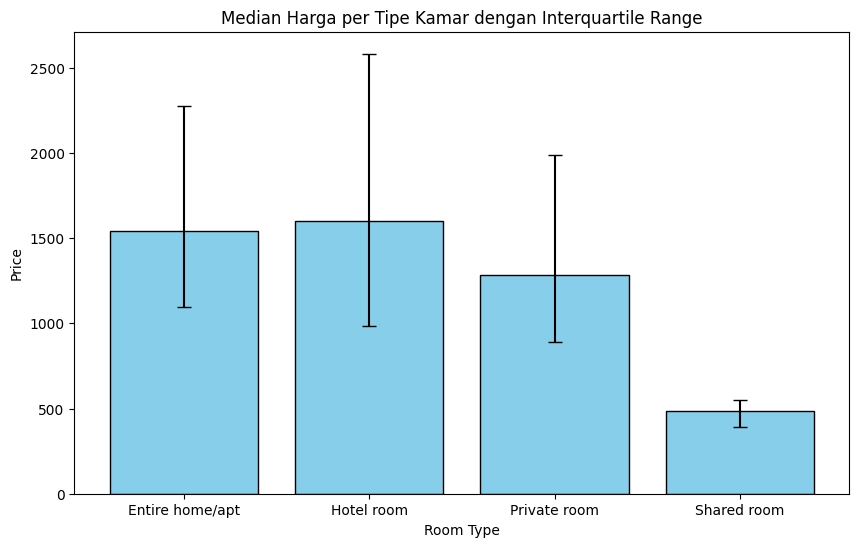

In [ ]:
import matplotlib.pyplot as plt

# Menghitung nilai tengah dari bar dan rentang error (Q3 - Q1)
bar_positions = statistik_harga.index
median_values = statistik_harga['Median']
error_bars = [(median_values - statistik_harga['Lower_Q1']), (statistik_harga['Upper_Q3'] - median_values)]

plt.figure(figsize=(10, 6))
plt.bar(bar_positions, median_values, yerr=error_bars, capsize=5, color='skyblue', edgecolor='black')
plt.title('Median Harga per Tipe Kamar dengan Interquartile Range')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

**Berdasarkan analisis penentuan harga yang optimal didapatkan hasil harga untuk masing-masing tipe kamar dalam dollar, sebagai berikut:**
**1. Shared Room: Harga optimal di 486 dengan rentang harga optimal di 390 hingga 550**
**2. Private Room: Harga optimal di 1282 dengan rentang harga optimal di 890 hingga 1990**
**3. Entire room/apt: Harga optimal di 1543 dengan rentang harga optimal di 1097,5 hingga 2277**
**4. Hotel room: Harga optimal di 1600 dengan rentang harga optimal di 984 hingga 2583**

# **KESIMPULAN DAN REKOMENDASI**

## Kesimpulan


Berdasarkan data understanding, data cleaning dan analisis data yang dilakukan, maka dapat disimpulkan:

1. Dari data 'Airbnb Listings Bangkok.csv', digunakan empat variabel yang relevan untuk dilakukan analisis data berdasarkan rumusan masalah dan tujuan yang akan dicapai yaitu: price, number_of_reviews, neighbourhood, dan room_type.

2. Data Bersih didapatkan melalui Data Understanding dan Data Cleaning dengan jumlah baris 12346 rows dan 10 columns/variabel untuk kemudian data ini digunakan dalam analisis.

3. Berdasarkan hasil analisis data dengan menggunakan variabel 'neighbourhood' dan 'number_of_reviews' didapatkan hasil wilayah yang tepat untuk dilakukan ekspansi Airbnb baru yaitu Khlong Toei, kemudian diikuti dengan Vadhana, Ratchathewi, Huai Khwang, Sathon, Bang Rak, Phra Nakhon, Chatu Chak, Phra Khanong dan Din Daeng.

4. Tipe Kamar yang paling tepat berdasarkan popularitas kamar dan Bar Plot yang telah dibuat adalah Entire home/apt, kemudian alternatif lain yang paling populer adalah Private room, diikuti hotel room dan shared room.

5. Harga optimal dan rentang harga optimal untuk masing-masing tipe kamar dalam dollar adalah: Shared Room: harga di 486 dan rentang harga di 390-550, Private Room: harga di 1282 dan rentang harga di 890-1990, Entire room/apt: Harga di 1543 dan rentang harga optimal di 1097,5 hingga 2277 serta Hotel room: Harga di 1600 dengan rentang harga di 984-2583.

## Rekomendasi

Berdasarkan analisis dan kesimpulan yang didapatkan, maka dapat diberikan rekomendasi untuk Perusahaan Airbnb yang akan melakukan ekspansi properti baru sebagai berikut:

1. Wilayah yang paling tepat dilakukan ekspansi adalah Khlong Toei, kemudian untuk alternatif lain wilayah yang paling tepat adalah Vadhana, Ratchathewi, Huai Khwang, Sathon, Bang Rak, Phra Nakhon, Chatu Chak, Phra Khanong dan Din Daeng. Artinya untuk menentukan wilayah ekpansi Aribnb baru akan optimal jika berada di 10 wilayah tersebut. Penentuan wilayah ini mungkin akan dipengaruhi oleh faktor lain di luar data yang diketahui.
2. Perusahaan seharusnya melakukan ekspansi di wilayah terpilih dengan memprioritaskan tipe kamar Entire home/apt. Namun jika menginginkan adanya variasi, maka private room dapat menjadi pilihan berikutnya diikuti dengan hotel room dan shared room sebagai pilihan terkahir.

3. Berdasarkan analisis penentuan harga yang optimal didapatkan hasil harga untuk masing-masing tipe kamar dalam dollar, sebagai berikut:

    a. Shared Room: Harga optimal di 486 dengan rentang harga optimal di 390 hingga 550

    b. Private Room: Harga optimal di 1282 dengan rentang harga optimal di 890 hingga 1990

    c. Entire room/apt: Harga optimal di 1543 dengan rentang harga optimal di 1097,5 hingga 2277
    
    d. Hotel room: Harga optimal di 1600 dengan rentang harga optimal di 984 hingga 2583